# Project: Investigate a Dataset - [Amazon Orders]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#recommendations">Recommendations</a></li>    
</ul> 

<a id='intro'></a>
## Introduction

### The Dataset chosen for analysis: Amazon Orders

>This dataset includes records about amazon orders in the united states over years 2014- 2018. 


### Questions for Analysis:
> What is the market share in terms of Sales per Region and State?

> What is the market share in terms of Volume per Region and State?

> What is the market share in terms of Profit per Region and State?

> Is there a correlation between Profit and Sales?

> Is there a correlation between Profit and Volume? 

> Is there a correlation between Profit and discount? 

> What is the top categories by Region and State?

> Overview of Sub-categories per Region.

> What is the percentage of orders return rate per region?

> What is the ratio of rturned orders per region?

> What is the states with highest orders return rate?

> Is there a correlation between  number of shipping days  and orders return rate?

> What are the months with highest return rate?

> What is the quarter of the year where the most orders placed?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

In [2]:
df =pd.read_csv('Orders.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Days,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns
0,1,CA-2016-152156,11/8/2016,11/11/2016,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,No
1,2,CA-2016-152156,11/8/2016,11/11/2016,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,No
2,3,CA-2016-138688,6/12/2016,6/16/2016,4,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,No
3,4,US-2015-108966,10/11/2015,10/18/2015,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,No
4,5,US-2015-108966,10/11/2015,10/18/2015,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Days           9994 non-null   int64  
 5   Ship Mode      9994 non-null   object 
 6   Customer ID    9994 non-null   object 
 7   Customer Name  9994 non-null   object 
 8   Segment        9994 non-null   object 
 9   Country        9994 non-null   object 
 10  City           9994 non-null   object 
 11  State          9994 non-null   object 
 12  Postal Code    9994 non-null   int64  
 13  Region         9994 non-null   object 
 14  Product ID     9994 non-null   object 
 15  Category       9994 non-null   object 
 16  Sub-Category   9994 non-null   object 
 17  Product Name   9994 non-null   object 
 18  Sales   

In [4]:
df.describe

<bound method NDFrame.describe of       Row ID        Order ID  Order Date   Ship Date  Days        Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016      3    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016      3    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016      4    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015      7  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015      7  Standard Class   
...      ...             ...         ...         ...    ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014      2    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017      5  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017      5  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017      5  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017      5    Second Class   

     Customer ID 

In [5]:
#Checking for duplicates..
df.duplicated().sum()

0

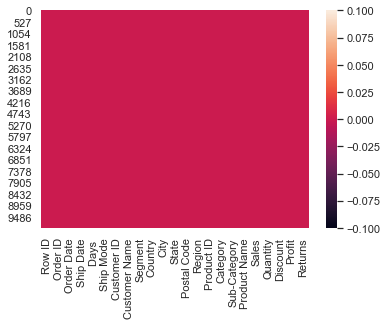

In [6]:
#Checking for null values..
sns.heatmap(df.isnull());

## Data Cleaning
### The Data Structure:
>Before cleaning the data, we have investigated the structure of our dataset and if there is any null values, missing values,  inconsistency or inadequate datatype, There were also unecessary columns with missing data, inadequate datatypes.

###  The Cleaning Process:
>I removed columns that are not necessary for my analysis: 'Row ID', 'Country', 'Postal Code', 'Customer Name' to improve database redability.

>I checked for null values.

>I checked for duplicates.

>I changed the type of both 'order_date' and 'ship_date' into datetime64.

>I added another column 'order_month'.

In [7]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Days,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns
0,1,CA-2016-152156,11/8/2016,11/11/2016,3,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,No


In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
#Dropping unnecessary columns..
df.drop(['Row ID', 'Country', 'Postal Code', 'Customer Name' ], axis = 1, inplace=True)

In [10]:
df.head(1)

,Order ID,Order Date,Ship Date,Days,Ship Mode,Customer ID,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returns
0,CA-2016-152156,11/8/2016,11/11/2016,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,No


In [11]:
#Improving the columns names for easier manipulation..
df.rename(columns= lambda x: x.strip().lower().replace(' ','_'), inplace = True)

In [12]:
#Changing the type of data in the returns column for better insights..
df['returns'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [13]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [14]:
df['order_month'] = df['order_date'].dt.month

In [15]:
df.head(1)

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,11


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   object        
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_date     9994 non-null   datetime64[ns]
 3   days          9994 non-null   int64         
 4   ship_mode     9994 non-null   object        
 5   customer_id   9994 non-null   object        
 6   segment       9994 non-null   object        
 7   city          9994 non-null   object        
 8   state         9994 non-null   object        
 9   region        9994 non-null   object        
 10  product_id    9994 non-null   object        
 11  category      9994 non-null   object        
 12  sub-category  9994 non-null   object        
 13  product_name  9994 non-null   object        
 14  sales         9994 non-null   float64       
 15  quantity      9994 non-null   int64   

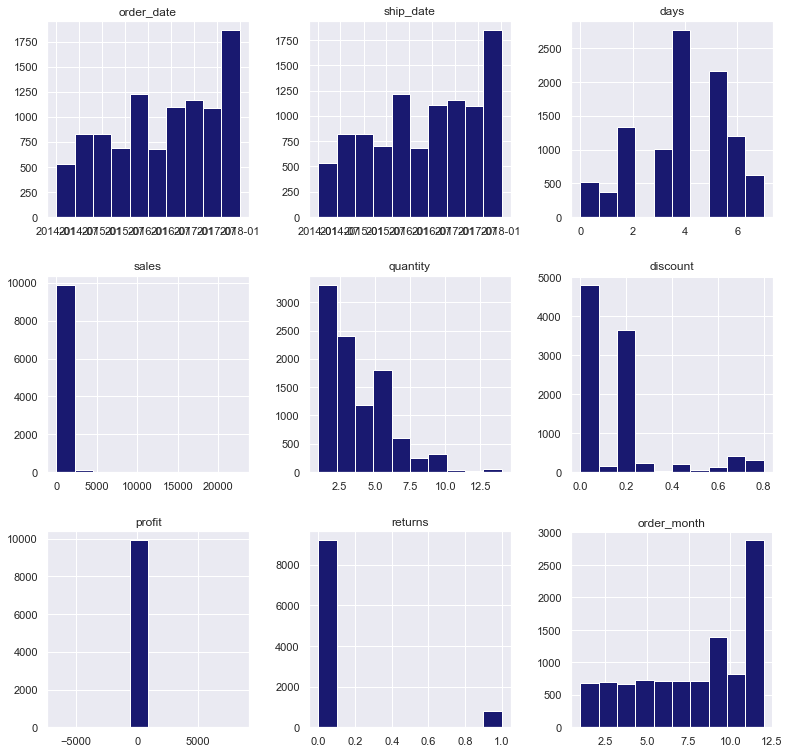

In [17]:
#An Overview of the dataset..
df.hist(figsize=(13,13),
        color = 'midnightblue');

# Market Share in terms of Sales, volume and profit

# State

### In terms of Sales:

In [18]:
state_sales = df.groupby('state')['sales'].sum().sort_values(ascending = False)
state_sales

state
California              457687.6315
New York                310876.2710
Texas                   170188.0458
Washington              138641.2700
Pennsylvania            116511.9140
Florida                  89473.7080
Illinois                 80166.1010
Ohio                     78258.1360
Michigan                 76269.6140
Virginia                 70636.7200
North Carolina           55603.1640
Indiana                  53555.3600
Georgia                  49095.8400
Kentucky                 36591.7500
New Jersey               35764.3120
Arizona                  35282.0010
Wisconsin                32114.6100
Colorado                 32108.1180
Tennessee                30661.8730
Minnesota                29863.1500
Massachusetts            28634.4340
Delaware                 27451.0690
Maryland                 23705.5230
Rhode Island             22627.9560
Missouri                 22205.1500
Oklahoma                 19683.3900
Alabama                  19510.6400
Oregon                

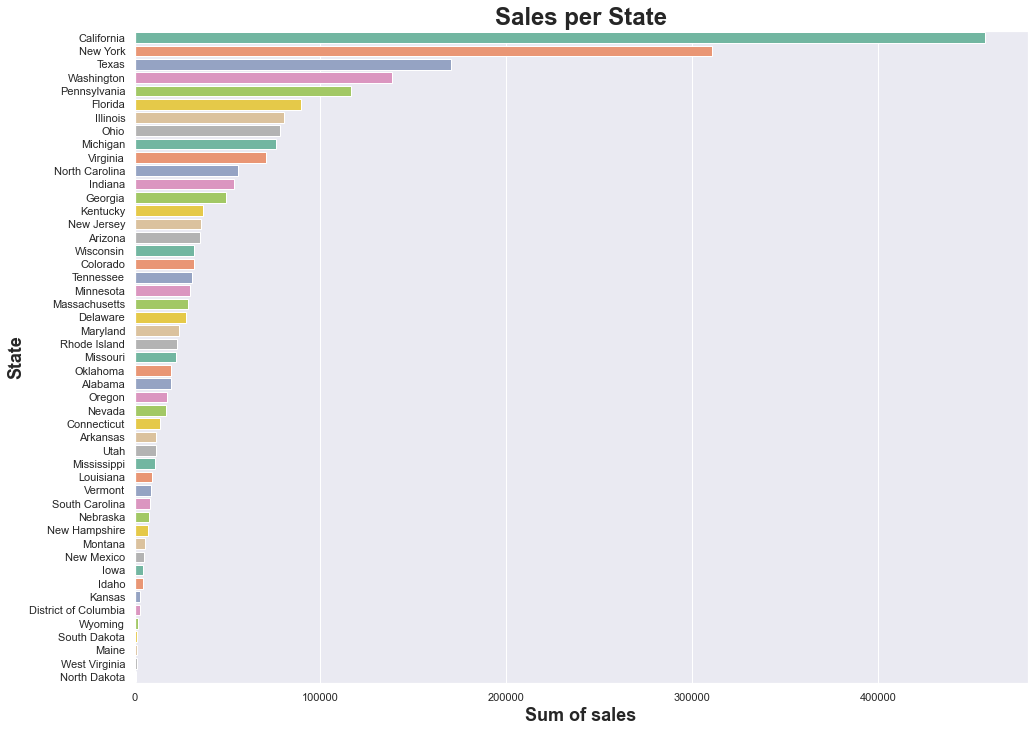

In [19]:
plt.figure(figsize=(16,12))
sns.barplot(x = state_sales,
            y = state_sales.index,
            palette='Set2')
plt.title('Sales per State', fontsize = 24, weight = 'bold')
plt.xlabel('Sum of sales', fontsize = 18, weight = 'bold')
plt.ylabel('State', fontsize = 18, weight = 'bold')
plt.show();

> California, New york and Texas are the states with highest market share in terms of sales

### In terms of volume:

In [20]:
state_volume = df.groupby('state')['quantity'].sum().sort_values(ascending = False)
state_volume

state
California              7667
New York                4224
Texas                   3724
Pennsylvania            2153
Washington              1883
Illinois                1845
Ohio                    1759
Florida                 1379
North Carolina           983
Michigan                 946
Virginia                 893
Arizona                  862
Georgia                  705
Colorado                 693
Tennessee                681
Indiana                  578
Kentucky                 523
Oregon                   499
Massachusetts            491
Wisconsin                463
New Jersey               454
Maryland                 420
Delaware                 367
Minnesota                331
Connecticut              281
Alabama                  256
Missouri                 252
Oklahoma                 247
Arkansas                 240
Mississippi              221
Utah                     219
Rhode Island             199
South Carolina           172
Nevada                   168
Louisian

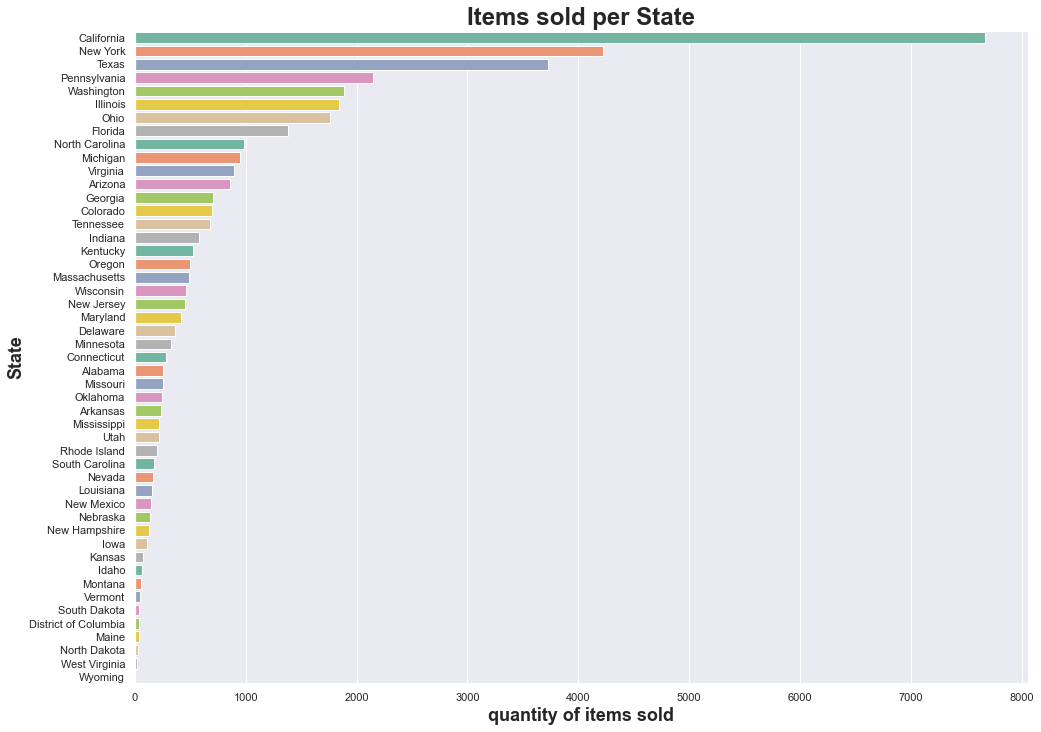

In [21]:
plt.figure(figsize=(16,12))
sns.barplot(x = state_volume,
            y = state_volume.index,
            palette='Set2')
plt.title('Items sold per State', fontsize = 24, weight = 'bold')
plt.xlabel('quantity of items sold', fontsize = 18, weight = 'bold')
plt.ylabel('State', fontsize = 18, weight = 'bold')
plt.show();

> California, New york and Texas are the states with highest market share in terms of volume.

### In terms of profit:

In [22]:
state_profit = df.groupby('state')['profit'].sum().sort_values(ascending = False)
state_profit

state
California              76381.3871
New York                74038.5486
Washington              33402.6517
Michigan                24463.1876
Virginia                18597.9504
Indiana                 18382.9363
Georgia                 16250.0433
Kentucky                11199.6966
Minnesota               10823.1874
Delaware                 9977.3748
New Jersey               9772.9138
Wisconsin                8401.8004
Rhode Island             7285.6293
Maryland                 7031.1788
Massachusetts            6785.5016
Missouri                 6436.2105
Alabama                  5786.8253
Oklahoma                 4853.9560
Arkansas                 4008.6871
Connecticut              3511.4918
Nevada                   3316.7659
Mississippi              3172.9762
Utah                     2546.5335
Vermont                  2244.9783
Louisiana                2196.1023
Nebraska                 2037.0942
Montana                  1833.3285
South Carolina           1769.0566
New Hampshire 

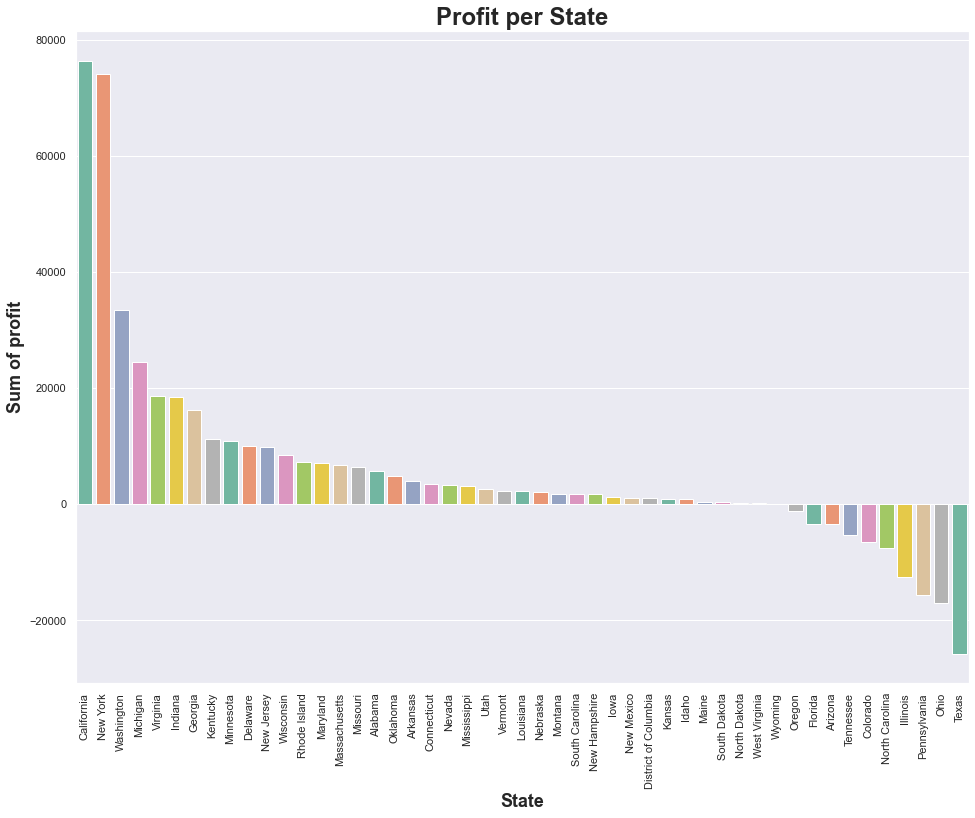

In [23]:
plt.figure(figsize=(16,12))
sns.barplot(x = state_profit.index,
            y = state_profit,
            palette='Set2')
plt.title('Profit per State', fontsize = 24, weight = 'bold')
plt.xlabel('State', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of profit', fontsize = 18, weight = 'bold')
plt.xticks(rotation = 90)
plt.show();

>California and New york are by far the states with highest profits, while Texas made the highest loss.

# Region

In [24]:
df.head(1)

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,11


### In terms of Sales: 

In [25]:
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending = False)
region_sales

region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: sales, dtype: float64

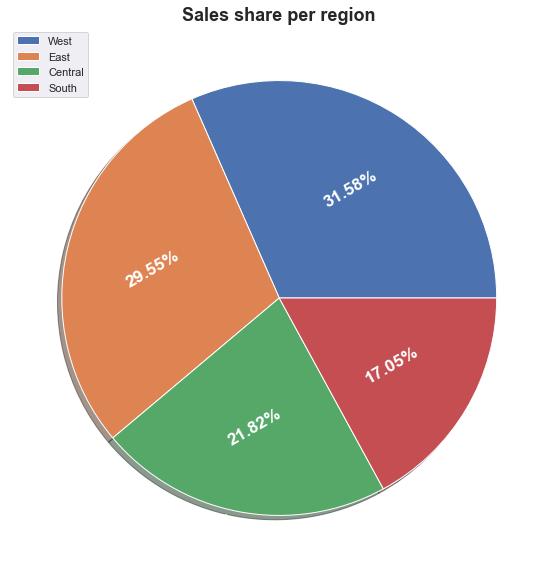

In [26]:
plt.figure(figsize=(14,10))
plt.pie(region_sales, labels=region_sales.index, autopct= '%.2f%%', shadow =True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Sales share per region', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

>The West have the highest share in terms of sales with 31.58%, while the South have the lowest share with only 17.05%

### In terms of volume: 

In [27]:
region_quantity = df.groupby('region')['quantity'].sum().sort_values(ascending = False)
region_quantity

region
West       12266
East       10618
Central     8780
South       6209
Name: quantity, dtype: int64

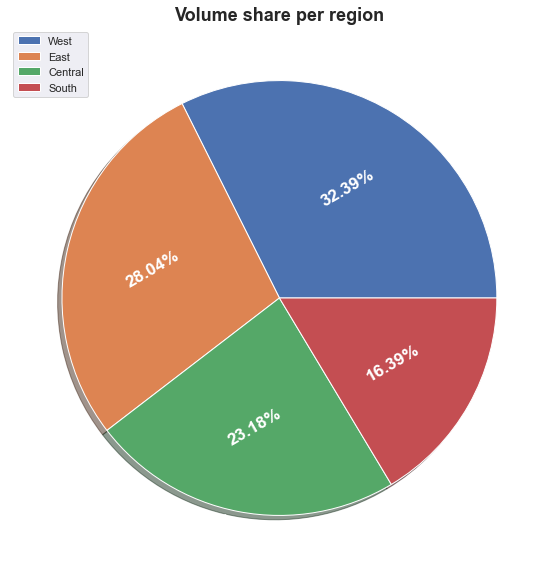

In [28]:
plt.figure(figsize=(14,10))
plt.pie(region_quantity, labels=region_quantity.index, autopct= '%.2f%%', shadow =True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Volume share per region', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

>The West have the highest share in terms of volume with 32.39%, while the South only shares 16.39%.

### In terms of profit: 

In [29]:
region_profit = df.groupby('region')['profit'].sum().sort_values(ascending = False)
region_profit

region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: profit, dtype: float64

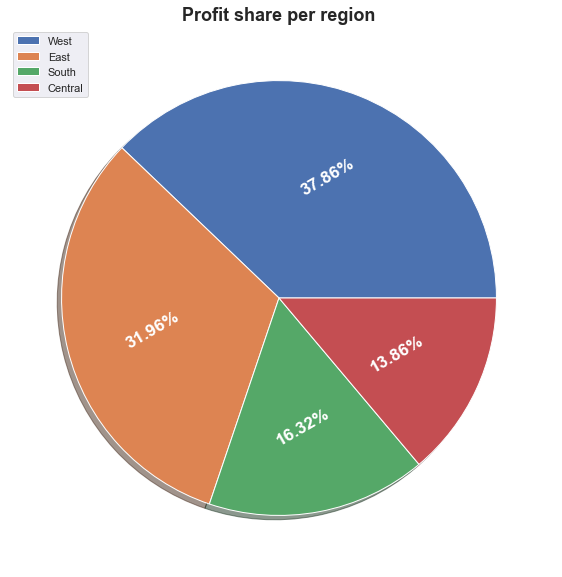

In [30]:
plt.figure(figsize=(14,10))
plt.pie(region_profit, labels=region_profit.index, autopct= '%.2f%%', shadow =True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Profit share per region', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show()

>The West have the highest share in terms of profit with 37.86%, while the Central only shares 13.86% of profits.

# Paramters and Profit

### Is there a correlation between Profit and Sales?

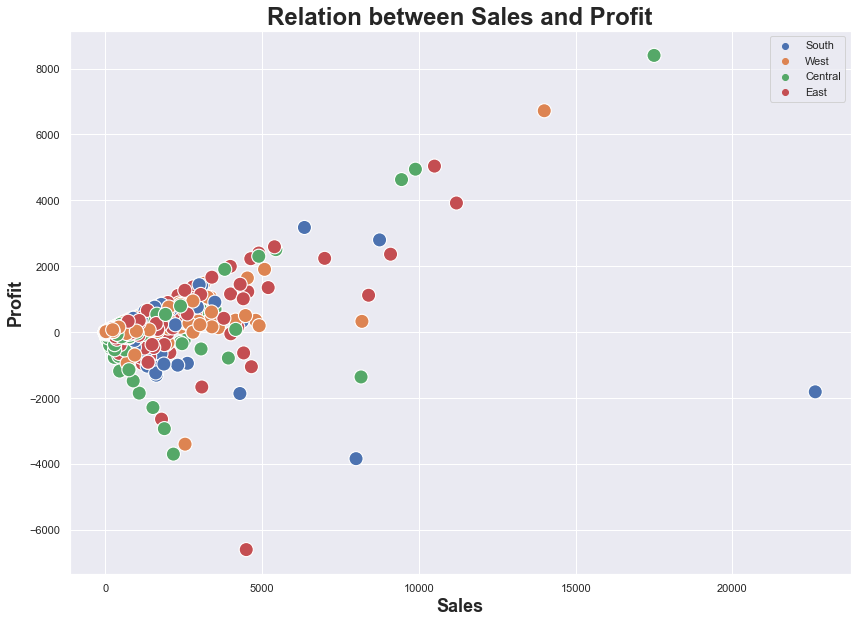

In [31]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'sales',
                y = 'profit',
                data = df,
                hue='region',
                s = 200)
plt.title('Relation between Sales and Profit', fontsize = 24, weight = 'bold')
plt.xlabel('Sales', fontsize = 18, weight = 'bold')
plt.ylabel('Profit', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>There is a weak positive correlation between sales and profit, the Central region seems to deviate from the trend of the data.

### Is there a correlation between Profit and Volume? 

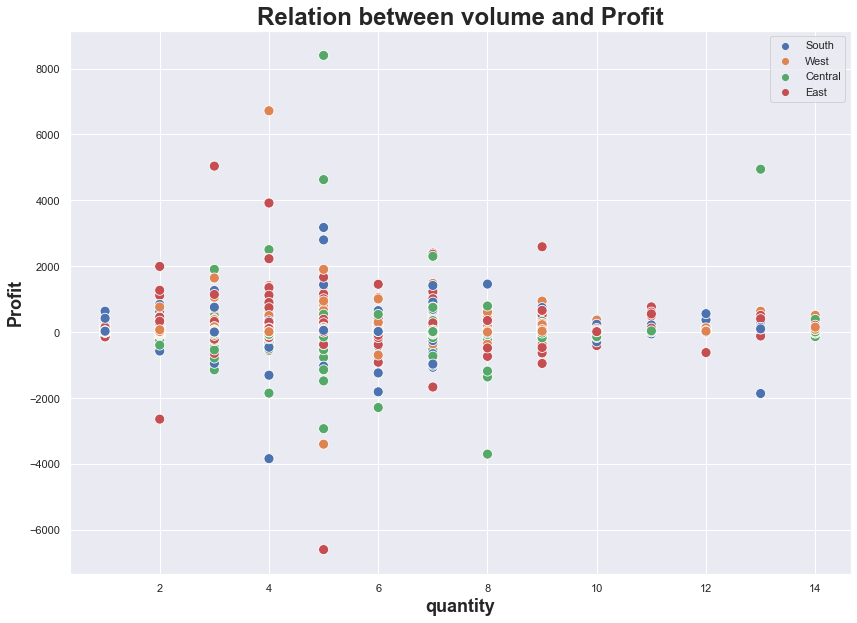

In [32]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'quantity',
                y = 'profit',
                data = df,
                hue='region',
                s = 100)
plt.title('Relation between volume and Profit', fontsize = 24, weight = 'bold')
plt.xlabel('quantity', fontsize = 18, weight = 'bold')
plt.ylabel('Profit', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>There is a weak negative correlation between profits and quantity of items sold.

### Is there a correlation between Profit and Volume? 

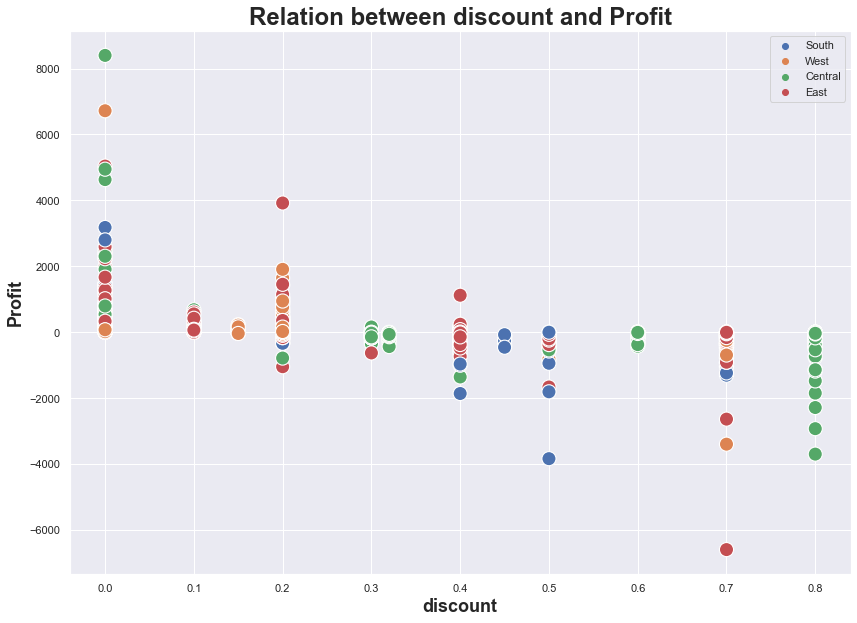

In [33]:
plt.figure(figsize=(14,10))
sns.scatterplot(x = 'discount',
                y = 'profit',
                data = df,
                hue='region',
                s = 200)
plt.title('Relation between discount and Profit', fontsize = 24, weight = 'bold')
plt.xlabel('discount', fontsize = 18, weight = 'bold')
plt.ylabel('Profit', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>There is a negative correlation between profit and discounts, the Central region has the highest discounts which cost it huge losses.

# What is the top categories by Region and State?

### By Region:

In [34]:
df.head(1)

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,11


In [35]:
df['category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [36]:
df['region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [37]:
region_category = df.groupby('region')['category'].value_counts()
region_category

region   category       
Central  Office Supplies    1422
         Furniture           481
         Technology          420
East     Office Supplies    1712
         Furniture           601
         Technology          535
South    Office Supplies     995
         Furniture           332
         Technology          293
West     Office Supplies    1897
         Furniture           707
         Technology          599
Name: category, dtype: int64

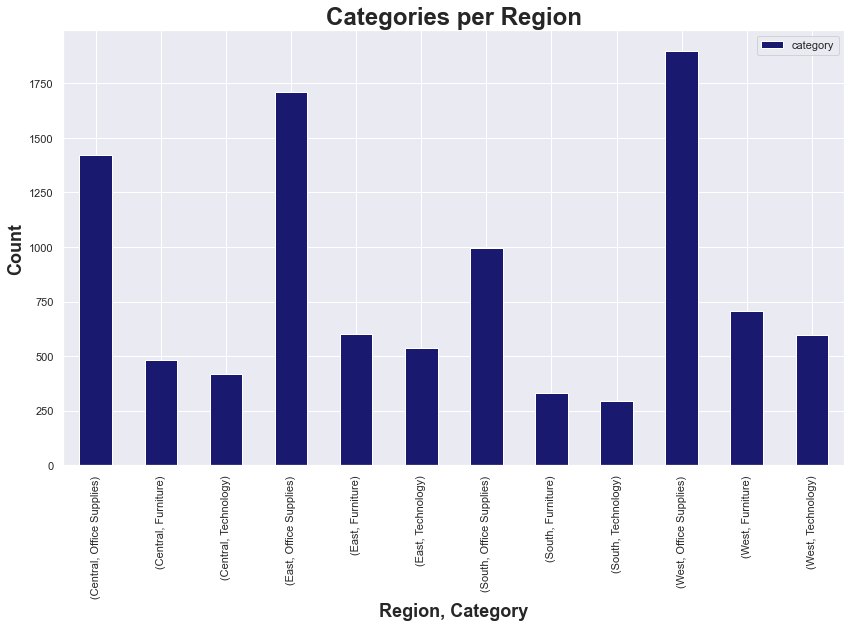

In [38]:
plt.figure(figsize=(14,8))
region_category.plot(kind = 'bar',
         color = 'midnightblue')
plt.title('Categories per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Region, Category', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>The four regions follows the same trend, Office Supplies is by far the most frequent category, then furniture and at last comes Technology.

## Overview of Sub-categories per Region: 

In [39]:
region_sub_category = df.groupby('region')['sub-category'].value_counts()
region_sub_category

region   sub-category
Central  Binders         366
         Paper           321
         Storage         210
         Furnishings     205
         Phones          200
                        ... 
West     Fasteners        72
         Supplies         69
         Envelopes        67
         Machines         39
         Copiers          25
Name: sub-category, Length: 68, dtype: int64

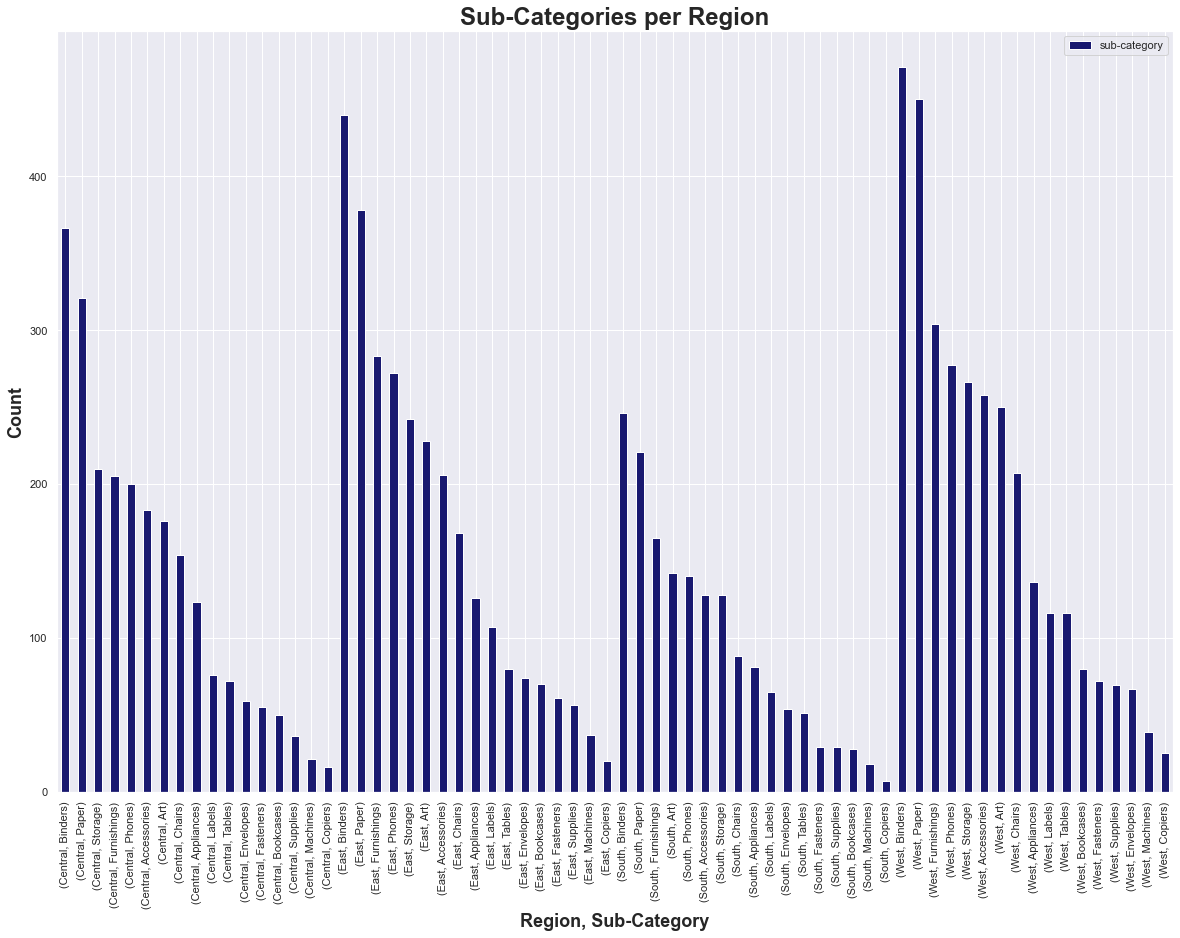

In [40]:
plt.figure(figsize=(20,14))
region_sub_category.plot(kind = 'bar',
         color = 'midnightblue')
plt.title('Sub-Categories per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Region, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

In [41]:
profit_sub_category = df.groupby('sub-category')['profit'].sum().sort_values(ascending = False)
profit_sub_category

sub-category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: profit, dtype: float64

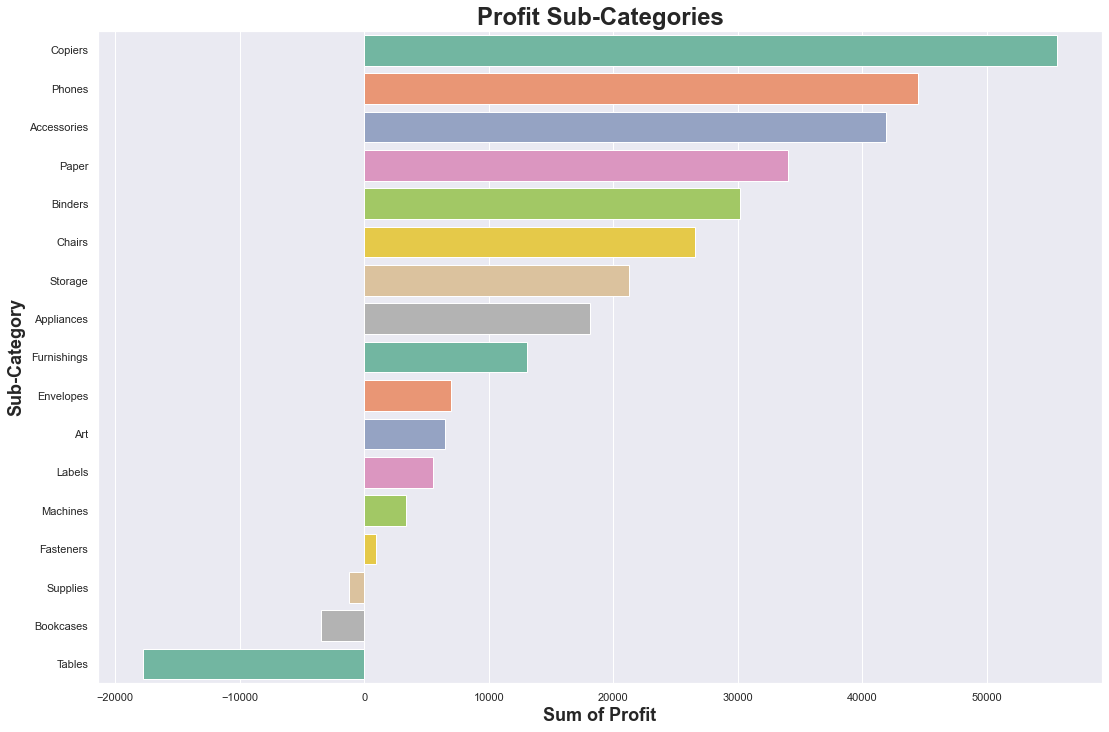

In [42]:
plt.figure(figsize=(18,12))
sns.barplot(x = profit_sub_category,
            y = profit_sub_category.index,
            palette = 'Set2')
plt.title('Profit Sub-Categories', fontsize = 24, weight = 'bold')
plt.xlabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.ylabel('Sub-Category', fontsize = 18, weight = 'bold')
plt.show();

>Copiers, Phones and Accessories are the most profitable sub-categories, while Tables sub-category is associated alone with almost 20,000 dollars loss.

### By State: 

### South

In [43]:
#Creating a data frame for only South region...
south_df = df.query('region == "South"')
south_df.head()

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0,11
1,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0,11
3,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,0,10
4,US-2015-108966,2015-10-11,2015-10-18,7,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0,10
12,CA-2017-114412,2017-04-15,2017-04-20,5,Standard Class,AA-10480,Consumer,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.5520,3,0.20,5.4432,0,4


In [44]:
south_category = south_df.groupby('state')['category'].value_counts()

In [45]:
south_df['state'].unique()

array(['Kentucky', 'Florida', 'North Carolina', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Louisiana', 'Georgia', 'Mississippi',
       'Arkansas'], dtype=object)

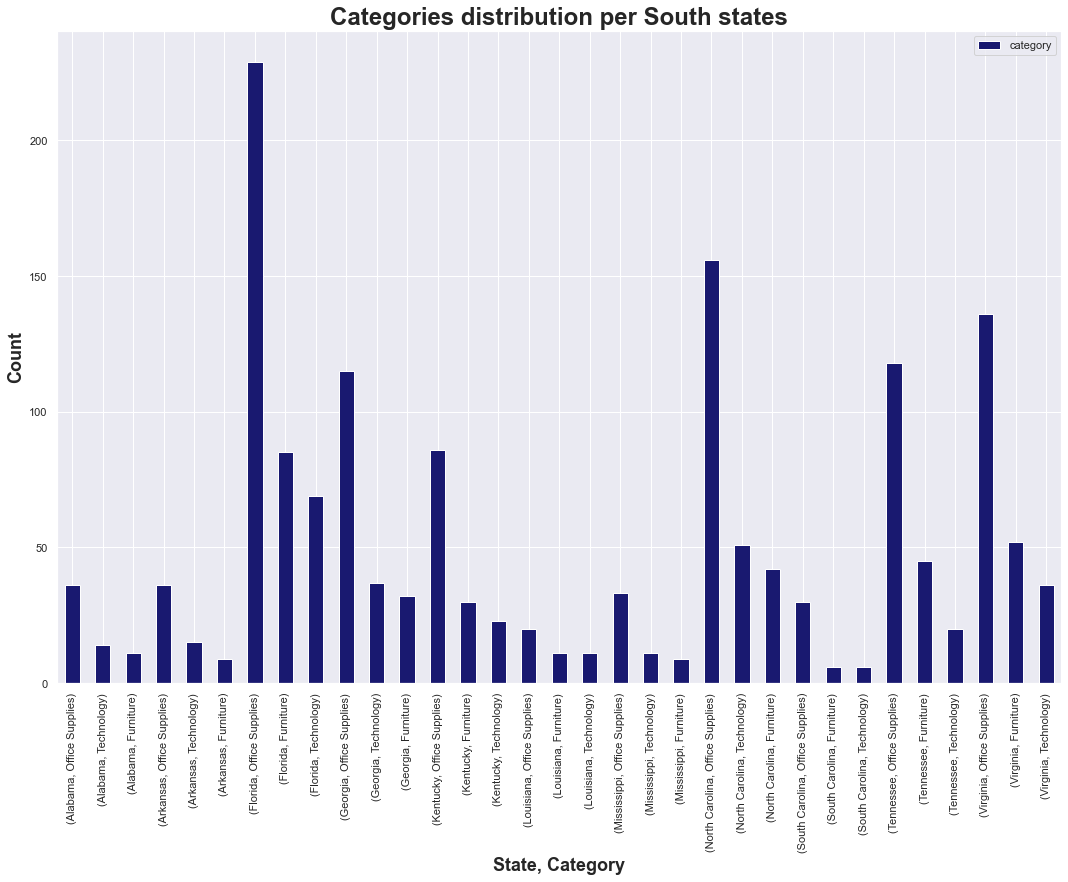

In [46]:
plt.figure(figsize=(18,12))
south_category.plot(kind = 'bar',
         color = 'midnightblue')
plt.title('Categories distribution per South states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Category', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>In all states the most frequent category is Office Supplies, Florida is the state with the highest number of orders in the south, while Louisiana comes last.

In [47]:
sub_category_south = south_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values(ascending = False).head(30)

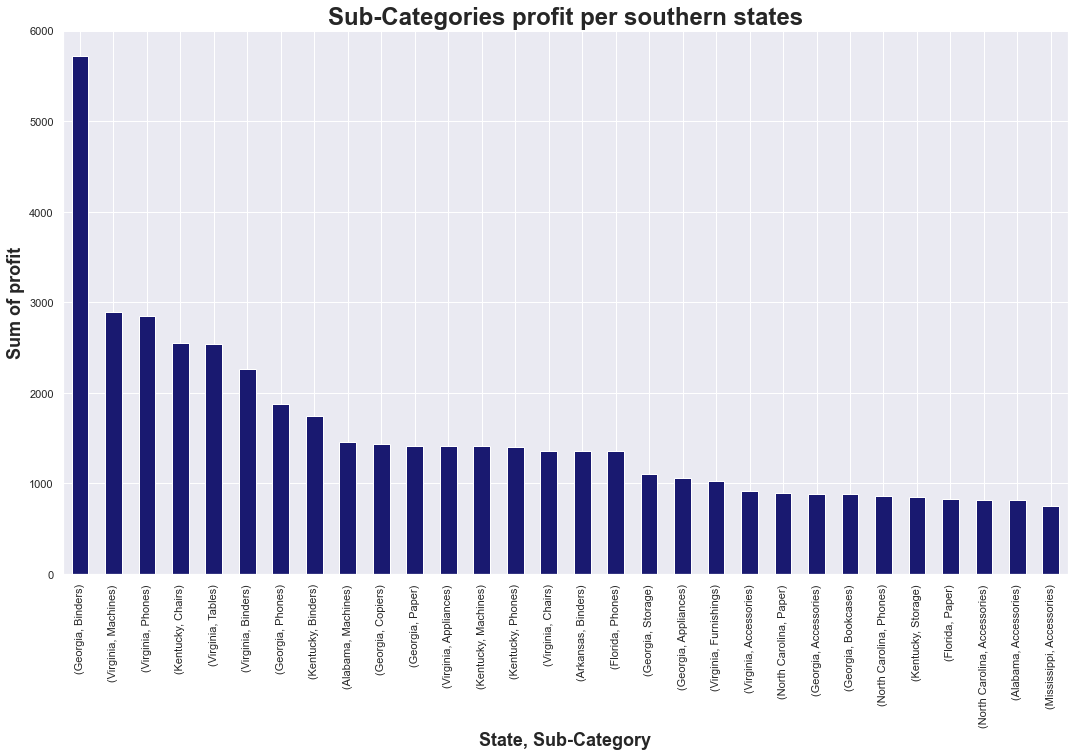

In [48]:
plt.figure(figsize=(18,10))
sub_category_south.plot(kind = 'bar',
                        color = 'midnightblue')
plt.title('Sub-Categories profit per southern states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of profit', fontsize = 18, weight = 'bold')
plt.show();

In [49]:
sub_category_south_low = south_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values().head(30)
sub_category_south_low

state           sub-category
North Carolina  Machines       -5384.8086
                Tables         -3684.2539
Tennessee       Binders        -3635.9181
Florida         Binders        -2760.7304
Tennessee       Tables         -2663.4138
Florida         Tables         -2493.1111
North Carolina  Binders        -2007.8254
Florida         Machines       -1976.0110
Tennessee       Storage         -333.5739
                Machines        -274.4095
Florida         Storage         -203.1068
                Supplies        -197.6315
                Bookcases       -116.0706
North Carolina  Bookcases        -97.9780
                Storage          -86.2088
Florida         Chairs           -37.5586
North Carolina  Supplies         -27.9803
Tennessee       Bookcases         -6.3236
Georgia         Fasteners          0.3024
Alabama         Fasteners          1.1946
Arkansas        Labels             3.4357
Louisiana       Appliances         4.6818
                Labels             5.2029
Missi

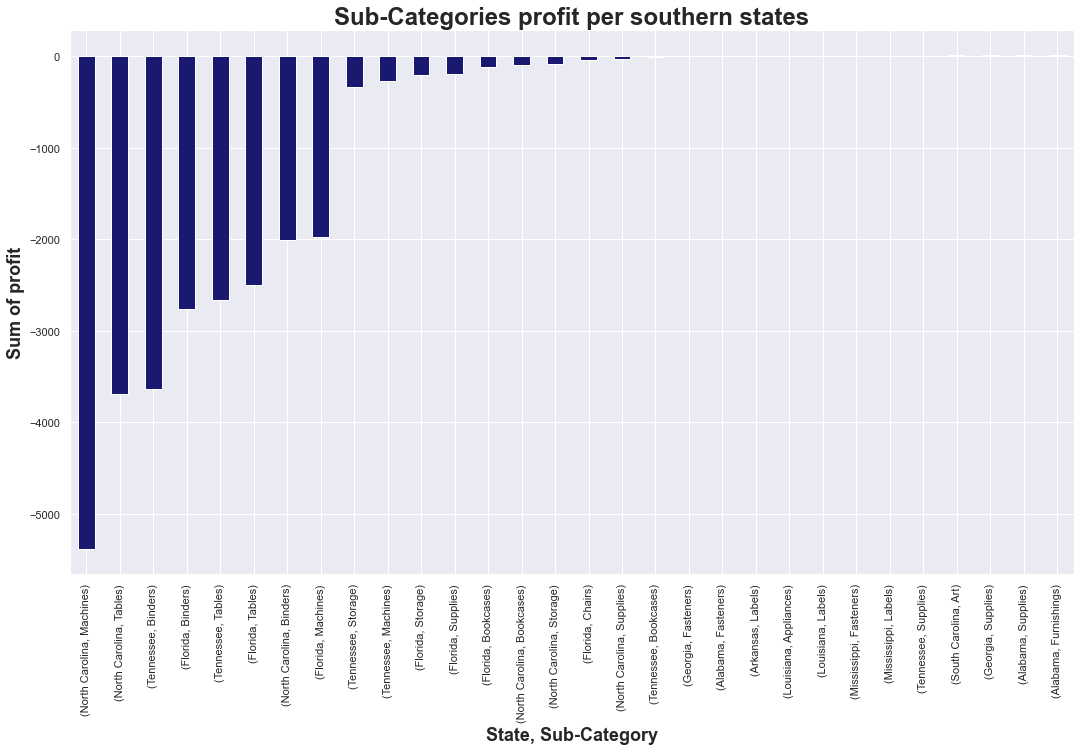

In [50]:
plt.figure(figsize=(18,10))
sub_category_south_low.plot(kind = 'bar',
                        color = 'midnightblue')
plt.title('Sub-Categories profit per southern states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of profit', fontsize = 18, weight = 'bold')
plt.show();

>In Southern states, the highest profit came from Georgia with the sub-category binders, the highest loss came from North Carolina with Machines and Tables.

# West

In [51]:
west_df = df.query('region == "West"')
west_df.head()

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
2,CA-2016-138688,2016-06-12,2016-06-16,4,Second Class,DV-13045,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,0,6
5,CA-2014-115812,2014-06-09,2014-06-14,5,Standard Class,BH-11710,Consumer,Los Angeles,California,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,0,6
6,CA-2014-115812,2014-06-09,2014-06-14,5,Standard Class,BH-11710,Consumer,Los Angeles,California,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656,0,6
7,CA-2014-115812,2014-06-09,2014-06-14,5,Standard Class,BH-11710,Consumer,Los Angeles,California,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152,0,6
8,CA-2014-115812,2014-06-09,2014-06-14,5,Standard Class,BH-11710,Consumer,Los Angeles,California,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,0,6


In [52]:
west_category = west_df.groupby('state')['category'].value_counts()

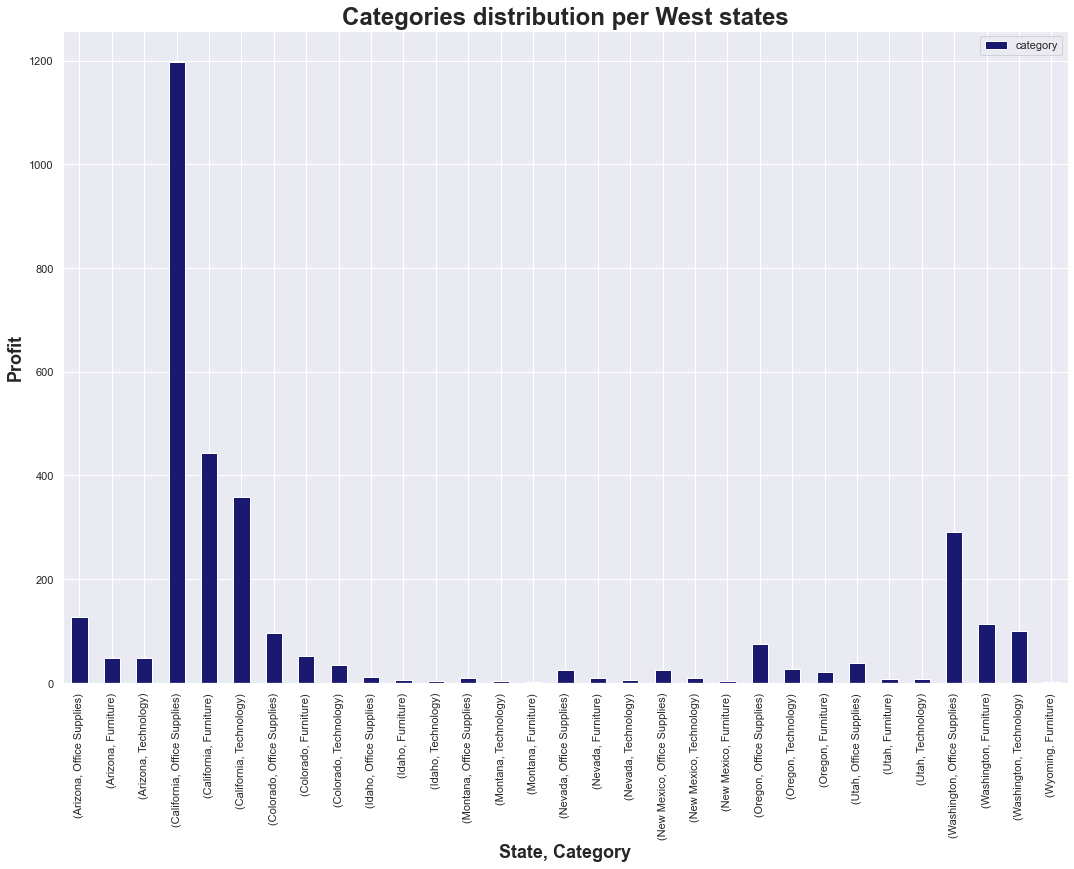

In [53]:
plt.figure(figsize=(18,12))
west_category.plot(kind = 'bar',
         color = 'midnightblue')
plt.title('Categories distribution per West states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Category', fontsize = 18, weight = 'bold')
plt.ylabel('Profit', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>In the West, California is by far the state with the highest share in terms of number of orders.

In [54]:
sub_category_west = west_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values(ascending = False).head(30)

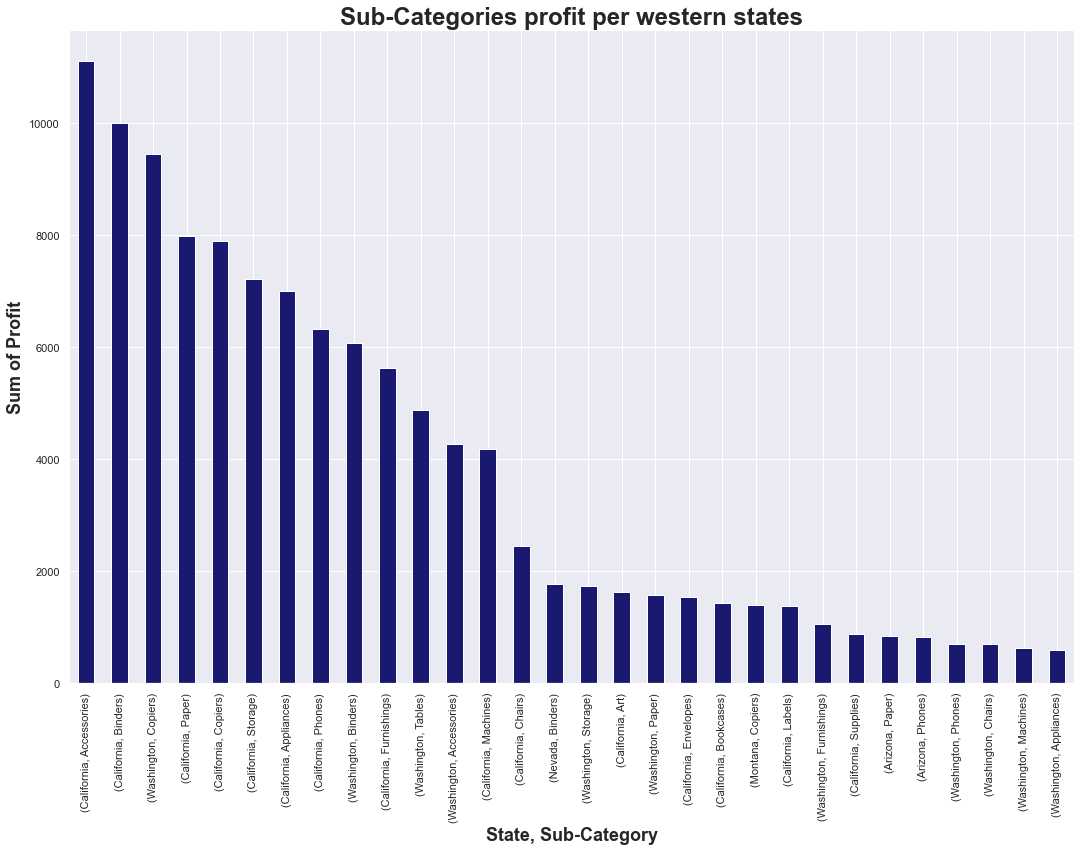

In [55]:
plt.figure(figsize=(18,12))
sub_category_west.plot(kind = 'bar',
         color = 'midnightblue')
plt.title('Sub-Categories profit per western states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.show()

In [56]:
sub_category_west_low = west_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values().head(30)

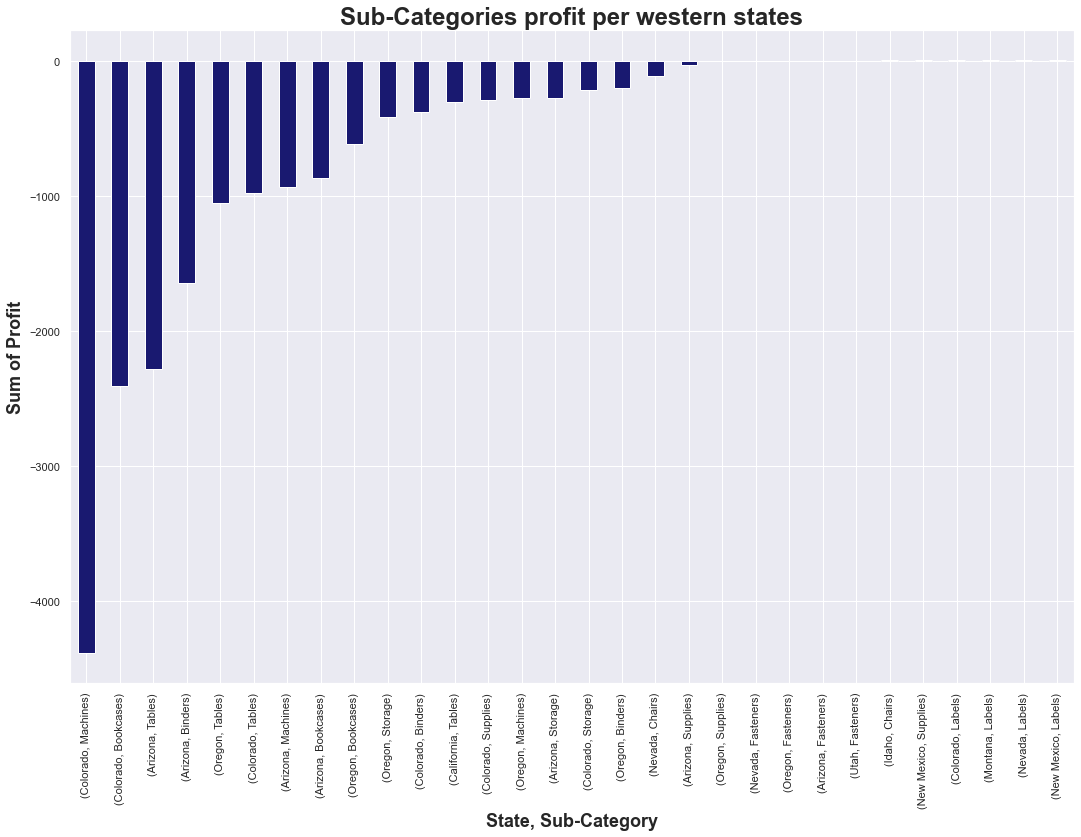

In [57]:
plt.figure(figsize=(18,12))
sub_category_west_low.plot(kind = 'bar',
         color = 'midnightblue')
plt.title('Sub-Categories profit per western states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.show()

>In the west, most almost all the profit comes from California, the highest sub-categories are Accessories, binders and paper,
while the highest loss in the west came from Colorado in the sub-category Machines.

# Central

In [58]:
central_df = df.query('region == "Central"')
central_df.head()

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
14,US-2015-118983,2015-11-22,2015-11-26,4,Standard Class,HP-14815,Home Office,Fort Worth,Texas,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.810,5,0.8,-123.8580,0,11
15,US-2015-118983,2015-11-22,2015-11-26,4,Standard Class,HP-14815,Home Office,Fort Worth,Texas,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.544,3,0.8,-3.8160,0,11
16,CA-2014-105893,2014-11-11,2014-11-18,7,Standard Class,PK-19075,Consumer,Madison,Wisconsin,Central,OFF-ST-10004186,Office Supplies,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176,0,11
21,CA-2016-137330,2016-12-09,2016-12-13,4,Standard Class,KB-16585,Corporate,Fremont,Nebraska,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.460,7,0.0,5.0596,0,12
22,CA-2016-137330,2016-12-09,2016-12-13,4,Standard Class,KB-16585,Corporate,Fremont,Nebraska,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884,0,12


In [59]:
central_category = central_df.groupby('state')['category'].value_counts()

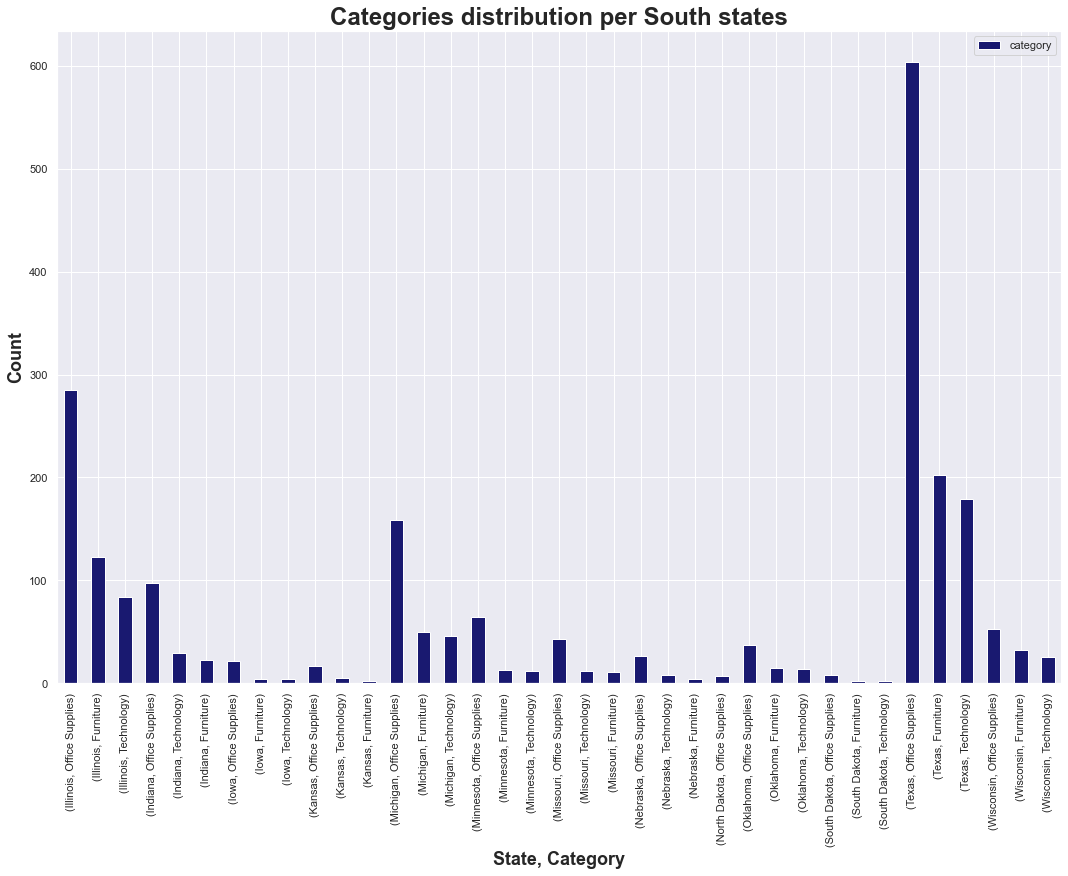

In [60]:
plt.figure(figsize=(18,12))
central_category.plot(kind = 'bar',
                      color = 'midnightblue')
plt.title('Categories distribution per South states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Category', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>In the Central, Texas is by far the state with the highest share in terms of number of orders, followed by Illinois.

In [61]:
sub_category_central = central_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values(ascending = False).head(30)
sub_category_central

state      sub-category
Michigan   Binders         11079.5050
Indiana    Copiers          8849.9670
Minnesota  Binders          6041.2760
Texas      Phones           3222.4608
Michigan   Chairs           3001.6506
Wisconsin  Chairs           2737.4205
Missouri   Copiers          2536.9632
Texas      Paper            2422.9703
Illinois   Copiers          1831.9666
Indiana    Binders          1827.1562
Michigan   Phones           1810.1694
Minnesota  Chairs           1703.9147
Illinois   Phones           1682.6887
Michigan   Accessories      1655.0608
Texas      Copiers          1629.9615
Indiana    Chairs           1587.5621
           Phones           1558.0269
Wisconsin  Accessories      1501.1720
Indiana    Appliances       1259.8645
Missouri   Appliances       1226.0318
Oklahoma   Phones           1185.2144
Illinois   Paper            1183.6766
Oklahoma   Chairs           1106.7992
Texas      Accessories      1105.8501
Wisconsin  Phones           1095.8977
Michigan   Tables         

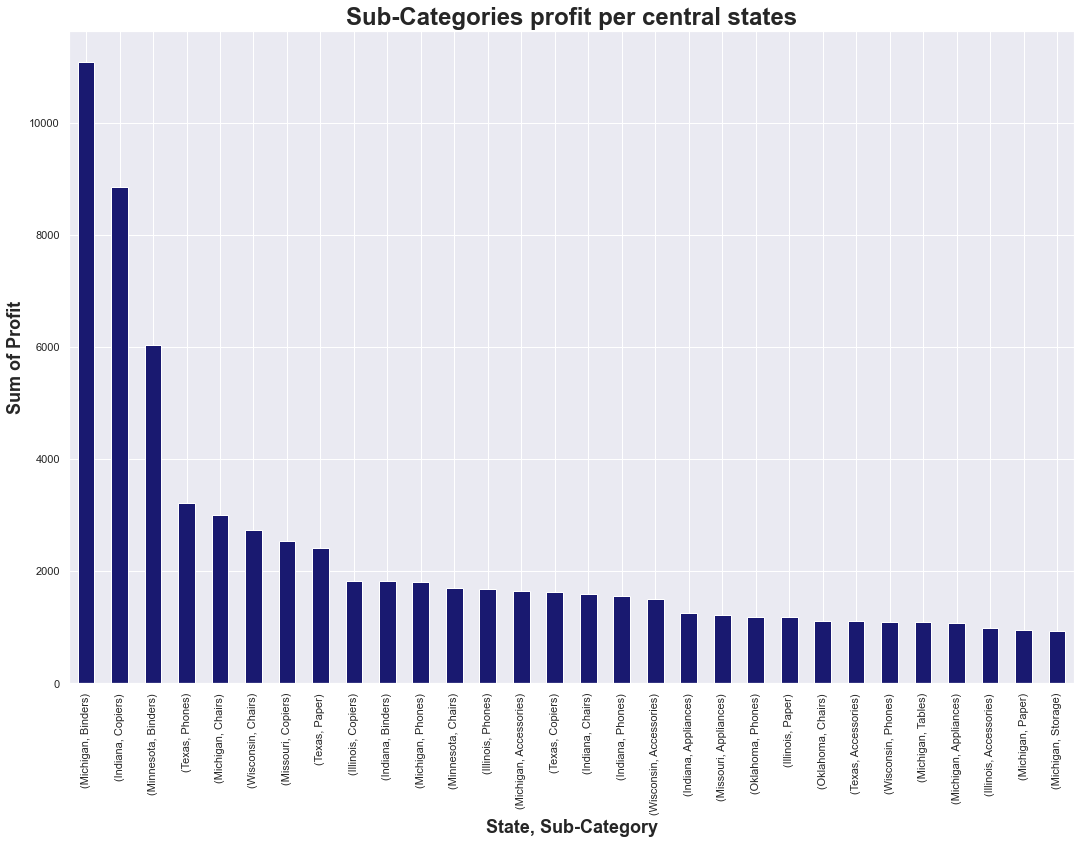

In [62]:
plt.figure(figsize=(18,12))
sub_category_central.plot(kind = 'bar',
                          color = 'midnightblue')
plt.title('Sub-Categories profit per central states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.show()

In [63]:
sub_category_central_low = central_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values().head(30)
sub_category_central_low

state         sub-category
Texas         Binders        -14705.0738
Illinois      Binders         -7204.3242
Texas         Appliances      -6147.2225
Illinois      Tables          -4309.7447
Texas         Furnishings     -3312.6786
              Machines        -2666.8434
Illinois      Furnishings     -2631.9766
Texas         Chairs          -2515.6490
Illinois      Appliances      -2482.4187
Texas         Bookcases       -2391.1377
              Tables          -2216.6766
Illinois      Chairs          -1578.6955
Texas         Supplies         -837.2795
              Storage          -763.7054
Illinois      Bookcases        -555.8726
              Storage          -257.4584
Indiana       Fasteners           0.1008
Wisconsin     Fasteners           0.6516
South Dakota  Fasteners           2.6814
North Dakota  Fasteners           3.4827
Iowa          Storage             3.5048
Nebraska      Art                 5.0596
              Supplies            5.0700
Wisconsin     Supplies        

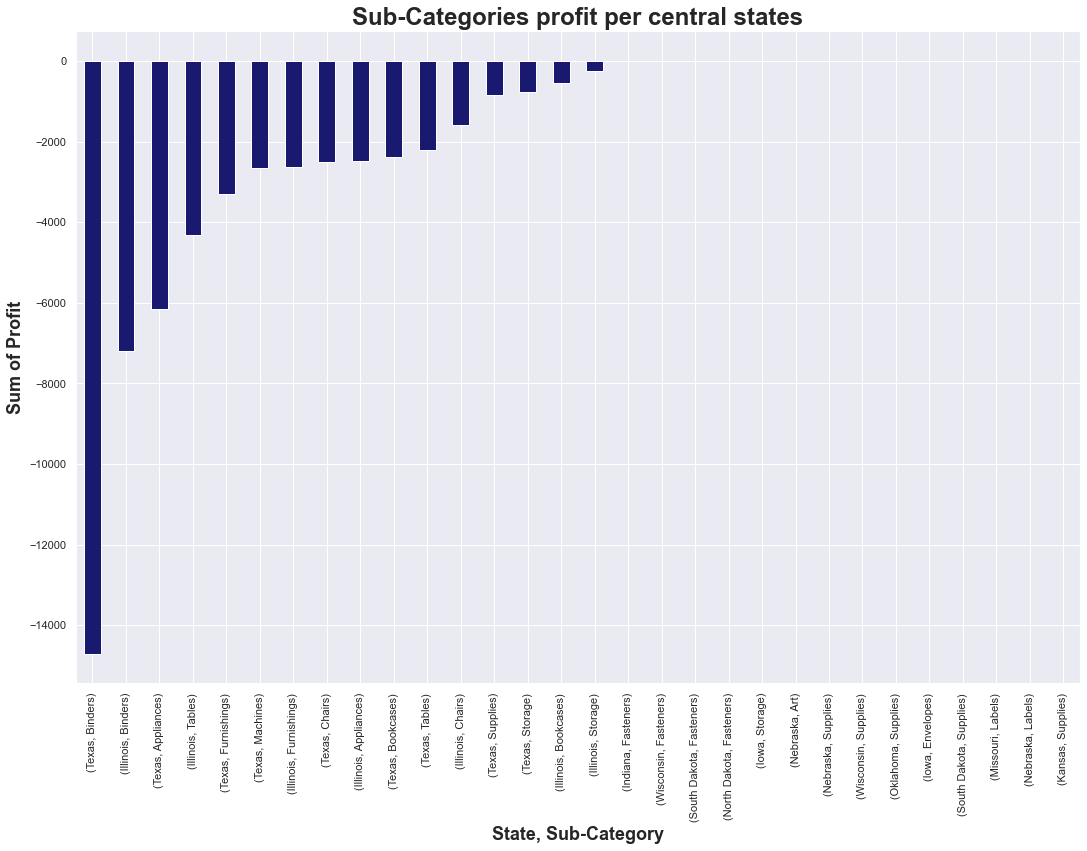

In [64]:
plt.figure(figsize=(18,12))
sub_category_central_low.plot(kind = 'bar',
                          color = 'midnightblue')
plt.title('Sub-Categories profit per central states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.show()

> Highest profit in the crntral states came from Michigan in the sub-category Binders, while almost all the losses came from Texas and Illinois.

# East

In [65]:
east_df = df.query('region == "East"')
east_df.head()

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
23,US-2017-156909,2017-07-16,2017-07-18,2,Second Class,SF-20065,Consumer,Philadelphia,Pennsylvania,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,0,7
27,US-2015-150630,2015-09-17,2015-09-21,4,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522,0,9
28,US-2015-150630,2015-09-17,2015-09-21,4,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,OFF-BI-10000474,Office Supplies,Binders,Avery Recycled Flexi-View Covers for Binding S...,9.618,2,0.7,-7.0532,0,9
29,US-2015-150630,2015-09-17,2015-09-21,4,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.200,3,0.2,15.5250,0,9
30,US-2015-150630,2015-09-17,2015-09-21,4,Standard Class,TB-21520,Consumer,Philadelphia,Pennsylvania,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,3.264,2,0.2,1.1016,0,9


In [66]:
east_category = east_df.groupby('state')['category'].value_counts()

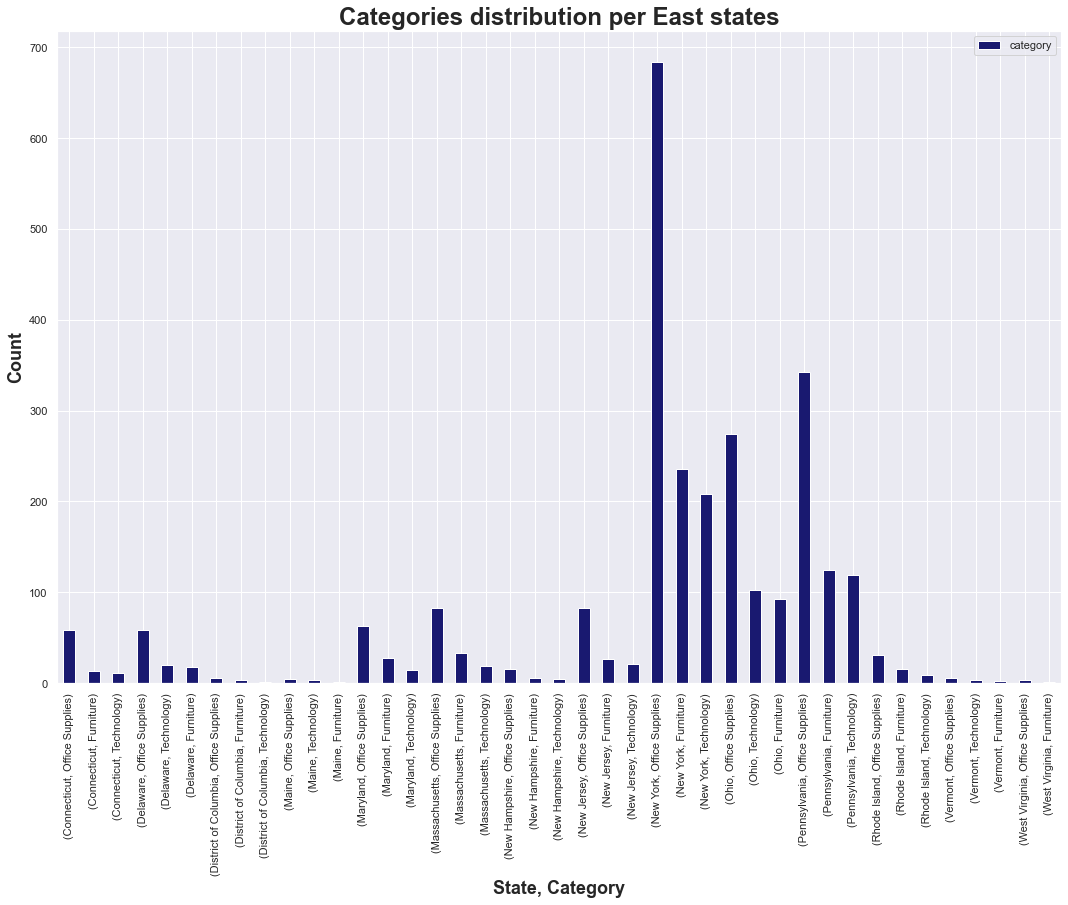

In [67]:
plt.figure(figsize=(18,12))
east_category.plot(kind = 'bar',
                      color = 'midnightblue')
plt.title('Categories distribution per East states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Category', fontsize = 18, weight = 'bold')
plt.ylabel('Count', fontsize = 18, weight = 'bold')
plt.legend()
plt.show()

>In the east, three states almost share the whole number of orders. New york, followed by Pennsylvania and Ohio.

In [68]:
sub_category_east = east_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values(ascending = False).head(30)
sub_category_east

state          sub-category
New York       Machines        17320.0762
               Phones          13399.1892
               Binders         11096.0260
               Chairs           7111.0119
               Copiers          5839.9500
               Accessories      5627.5702
Delaware       Copiers          5039.9856
New York       Storage          4338.2179
               Paper            4023.0799
               Appliances       3807.7645
Rhode Island   Copiers          3491.9388
New York       Furnishings      2931.4346
New Jersey     Machines         2709.9522
Pennsylvania   Copiers          1735.9829
New Jersey     Binders          1649.0788
Maryland       Binders          1595.5108
Ohio           Accessories      1452.8701
Rhode Island   Storage          1311.6043
New Jersey     Appliances       1203.4380
Delaware       Binders          1159.5970
               Storage          1119.3837
New Jersey     Phones           1110.6172
Massachusetts  Phones           1016.1553
Vermon

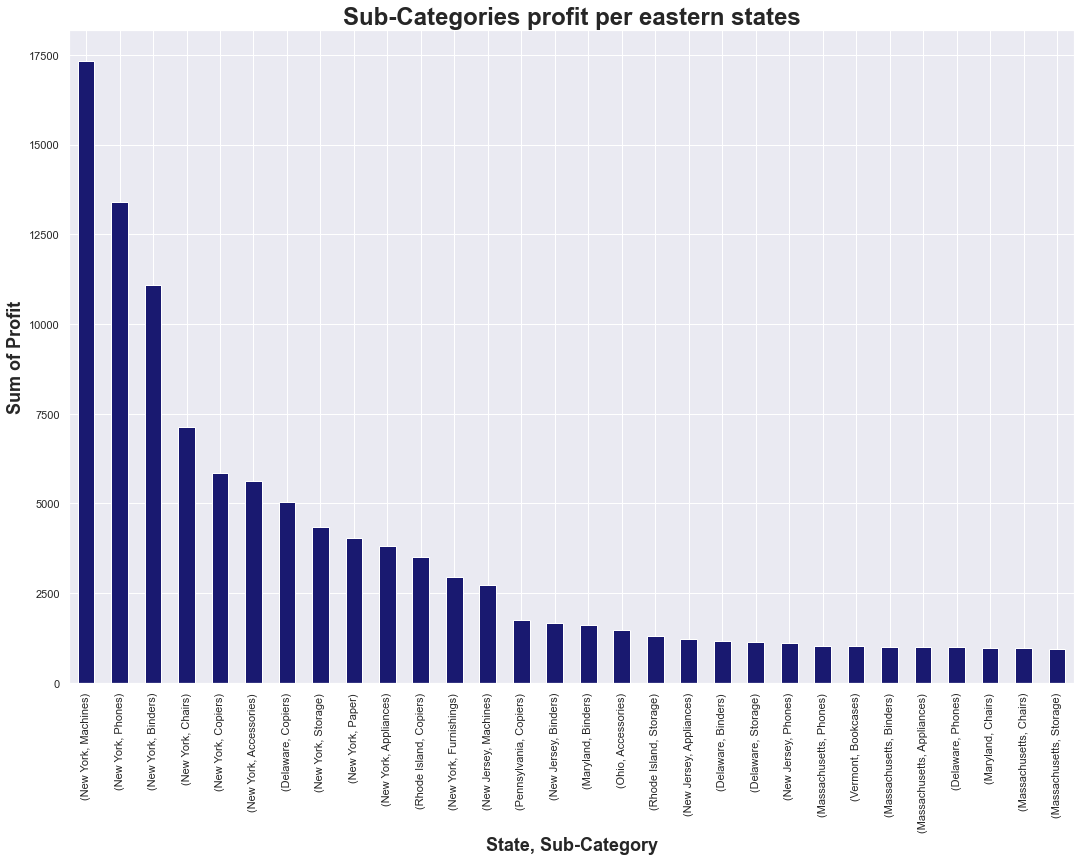

In [69]:
plt.figure(figsize=(18,12))
sub_category_east.plot(kind = 'bar',
                       color = 'midnightblue')
plt.title('Sub-Categories profit per eastern states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.show()

In [70]:
sub_category_east_low = east_df.groupby(['state', 'sub-category'])['profit'].sum().sort_values().head(30)
sub_category_east_low

state                 sub-category
Ohio                  Machines       -11770.9447
Pennsylvania          Binders         -4570.9750
New York              Tables          -4535.6408
Pennsylvania          Phones          -3606.9276
                      Bookcases       -2896.7601
Ohio                  Phones          -2778.8578
                      Tables          -2715.3345
Pennsylvania          Tables          -2588.7538
                      Machines        -2219.2456
                      Chairs          -1993.4180
                      Supplies        -1459.5663
                      Storage         -1434.3118
Ohio                  Binders         -1400.6681
                      Bookcases       -1359.0516
                      Chairs           -649.3542
Massachusetts         Tables           -545.2947
Ohio                  Storage          -276.3364
Rhode Island          Tables           -230.1678
New Hampshire         Tables           -105.3164
Delaware              Tables      

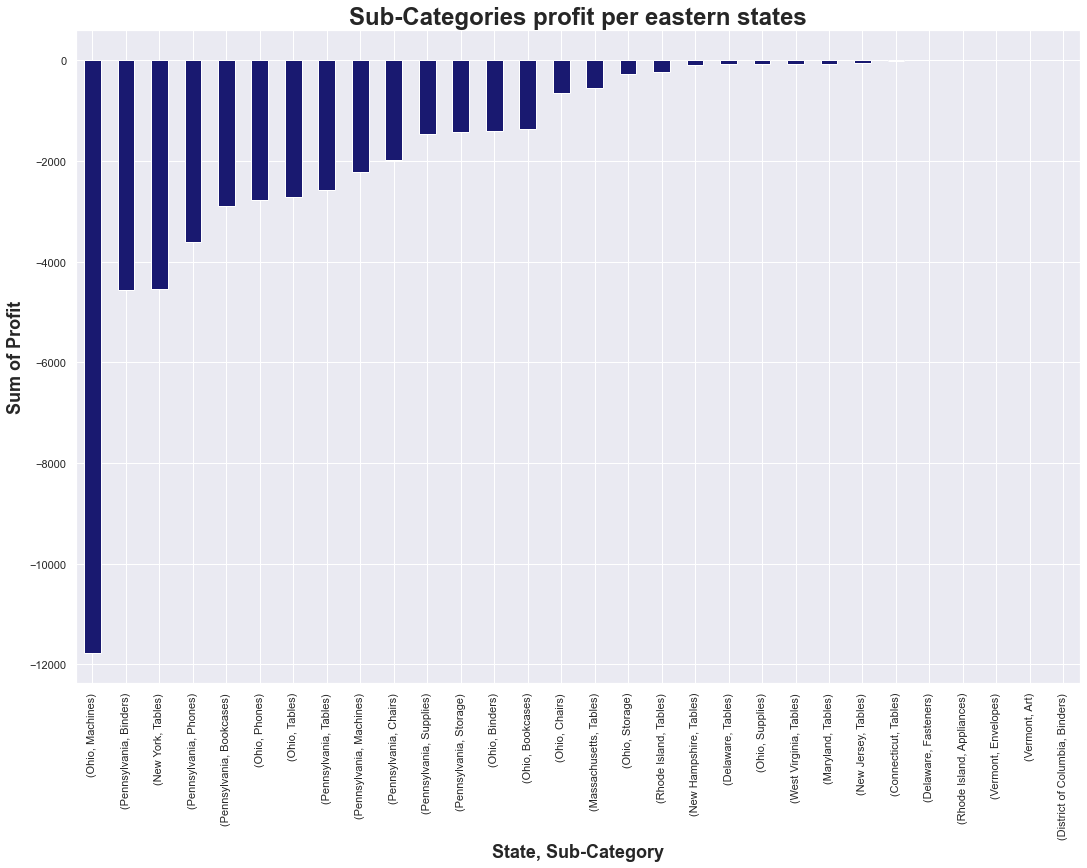

In [71]:
plt.figure(figsize=(18,12))
sub_category_east_low.plot(kind = 'bar',
                       color = 'midnightblue')
plt.title('Sub-Categories profit per eastern states', fontsize = 24, weight = 'bold')
plt.xlabel('State, Sub-Category', fontsize = 18, weight = 'bold')
plt.ylabel('Sum of Profit', fontsize = 18, weight = 'bold')
plt.show()

>In the East, New york leads the charts and Machines is the most profitable sub-category, while Ohio made almost 12000 dollars loss in Machines only.

# Orders return rate:

### per Region:

In [72]:
df.head(1)

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,11


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      9994 non-null   object        
 1   order_date    9994 non-null   datetime64[ns]
 2   ship_date     9994 non-null   datetime64[ns]
 3   days          9994 non-null   int64         
 4   ship_mode     9994 non-null   object        
 5   customer_id   9994 non-null   object        
 6   segment       9994 non-null   object        
 7   city          9994 non-null   object        
 8   state         9994 non-null   object        
 9   region        9994 non-null   object        
 10  product_id    9994 non-null   object        
 11  category      9994 non-null   object        
 12  sub-category  9994 non-null   object        
 13  product_name  9994 non-null   object        
 14  sales         9994 non-null   float64       
 15  quantity      9994 non-null   int64   

In [74]:
region_return = df.groupby('region')['returns'].sum()
region_return

region
Central     92
East       149
South       69
West       490
Name: returns, dtype: int64

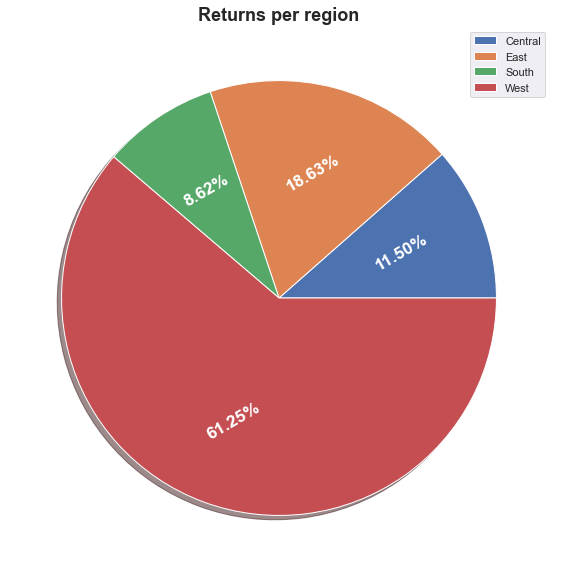

In [75]:
plt.figure(figsize=(14,10))
plt.pie(x = region_return,
        labels = region_return.index,
        autopct= '%.2f%%',
        shadow= True,
        textprops= {'size':'x-large',
                    'fontweight': 'bold',
                    'rotation': "30",
                    'color':'w'})
plt.title('Returns per region', fontsize = 18, fontweight = 'bold')     
plt.legend()
plt.show();


>The West shares 61.25% of all returned orders, while the South only shares 8.62%.

In [76]:
region_order = df.groupby('region')['order_id'].count()
region_order

region
Central    2323
East       2848
South      1620
West       3203
Name: order_id, dtype: int64

## Calcualting the ratio of returned orders:

In [77]:
Central_return_ratio =    92/2323
East_return_ratio =       149/2848
South_return_ratio  =      69/1620
West_return_ratio  =      490/3203

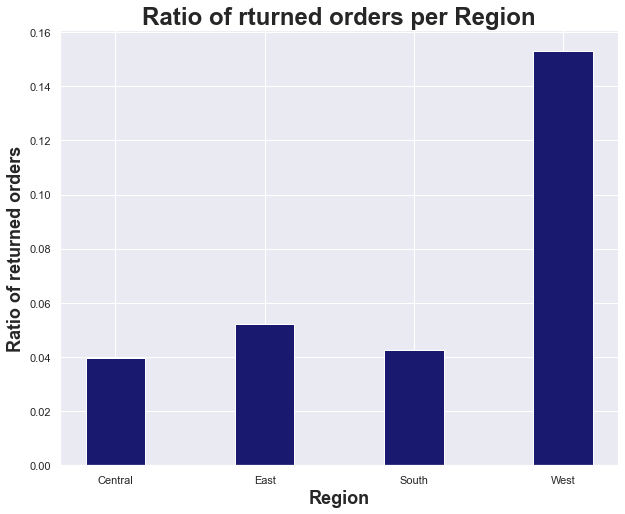

In [78]:
plt.figure(figsize=(10,8))
plt.bar(['Central','East','South','West'],
        height=[Central_return_ratio, East_return_ratio, South_return_ratio, West_return_ratio],
        width = 0.4,
        color = 'midnightblue')
plt.title('Ratio of rturned orders per Region', fontsize = 24, weight = 'bold')
plt.xlabel('Region', fontsize = 18, weight = 'bold')
plt.ylabel('Ratio of returned orders', fontsize = 18, weight = 'bold')
plt.show()

>In the West the ratio of returned orders is quite high with 15% of all orders, while the ratio hasn't exceed 5% for the three other regions.

### per State: 

### West

In [79]:
west_returns = west_df.groupby('state')['returns'].sum().sort_values(ascending = False)

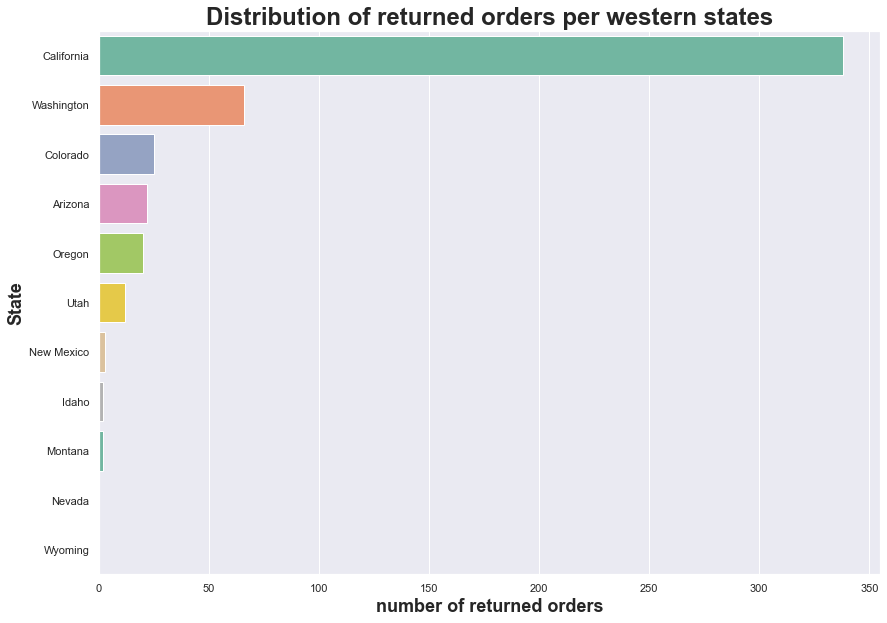

In [80]:
plt.figure(figsize=(14,10))
sns.barplot(x = west_returns,
            y = west_returns.index,
            palette='Set2')
plt.title('Distribution of returned orders per western states', fontsize = 24, weight = 'bold')
plt.xlabel('number of returned orders', fontsize = 18, weight = 'bold')
plt.ylabel('State', fontsize = 18, weight = 'bold')
plt.show();

>Almost all returned orders in the West comes from California followed by Washington.

### South

In [81]:
south_returns = south_df.groupby('state')['returns'].sum().sort_values(ascending = False)

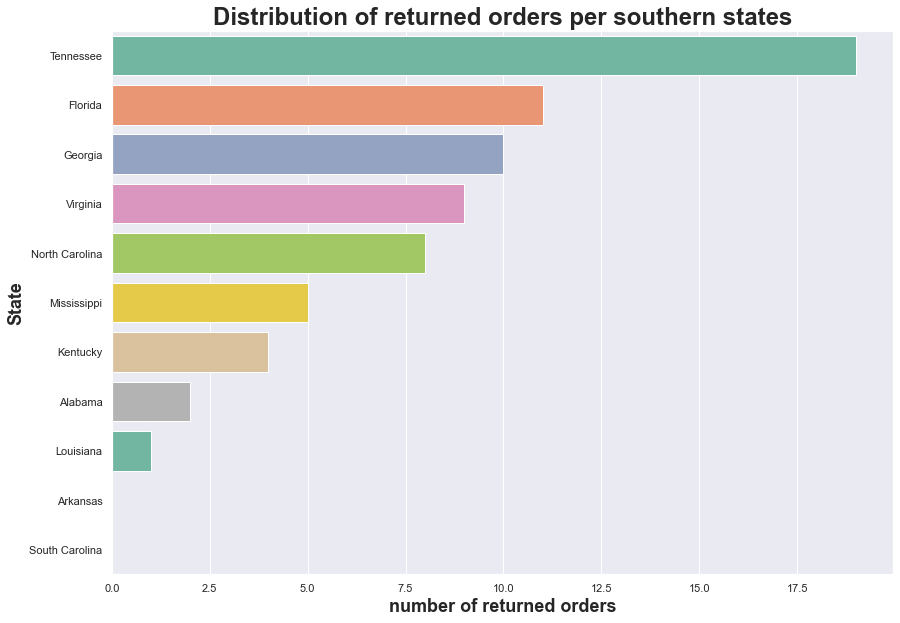

In [82]:
plt.figure(figsize=(14,10))
sns.barplot(x = south_returns,
            y = south_returns.index,
            palette='Set2')
plt.title('Distribution of returned orders per southern states', fontsize = 24, weight = 'bold')
plt.xlabel('number of returned orders', fontsize = 18, weight = 'bold')
plt.ylabel('State', fontsize = 18, weight = 'bold')
plt.show();

> In the South Tennessee is the state with the highest number of returned orders, followed by Florida and Georgia.

### Central

In [83]:
central_returns = central_df.groupby('state')['returns'].sum().sort_values(ascending = False)

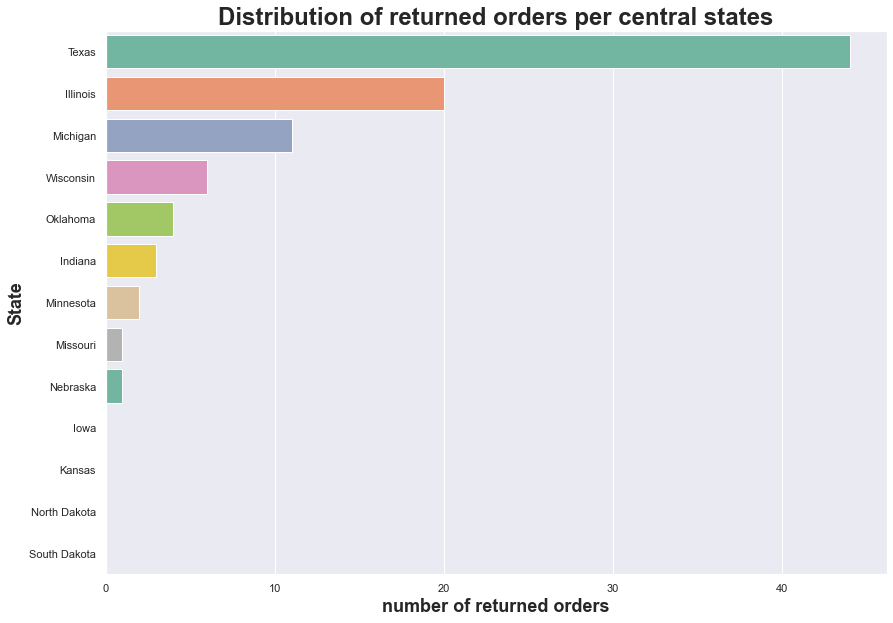

In [84]:
plt.figure(figsize=(14,10))
sns.barplot(x = central_returns,
            y = central_returns.index,
            palette='Set2')
plt.title('Distribution of returned orders per central states', fontsize = 24, weight = 'bold')
plt.xlabel('number of returned orders', fontsize = 18, weight = 'bold')
plt.ylabel('State', fontsize = 18, weight = 'bold')
plt.show();

>In the Central, Texas and Illinois are the states with the highest returned orderes.

### East 

In [85]:
east_returns = east_df.groupby('state')['returns'].sum().sort_values(ascending = False)

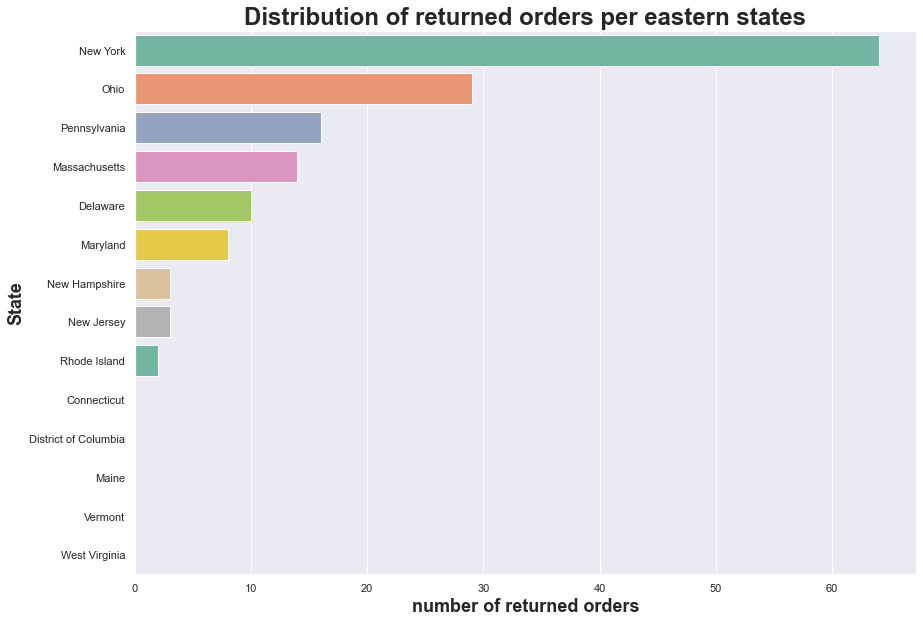

In [86]:
plt.figure(figsize=(14,10))
sns.barplot(x = east_returns,
            y = east_returns.index,
            palette='Set2')
plt.title('Distribution of returned orders per eastern states', fontsize = 24, weight = 'bold')
plt.xlabel('number of returned orders', fontsize = 18, weight = 'bold')
plt.ylabel('State', fontsize = 18, weight = 'bold')
plt.show();

> In the East, New york and Ohio are the states with the highest returned orders.

## Parameters and Returned Orders

In [87]:
df.head(1)

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,11


## Is there a correlation between shipping days  and return rate?

In [88]:
sub_returns = df.groupby('sub-category')['returns'].sum().sort_values(ascending = False)

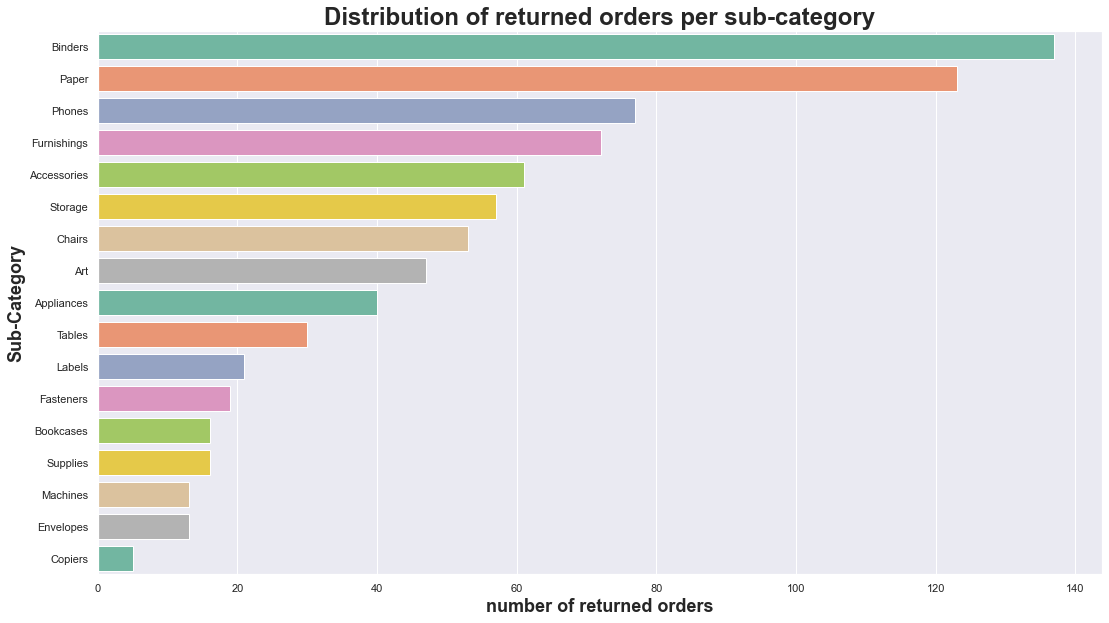

In [89]:
plt.figure(figsize=(18,10))
sns.barplot(x = sub_returns,
            y = sub_returns.index,
            palette = 'Set2')
plt.title('Distribution of returned orders per sub-category', fontsize = 24, weight = 'bold')
plt.xlabel('number of returned orders', fontsize = 18, weight = 'bold')
plt.ylabel('Sub-Category', fontsize = 18, weight = 'bold')
plt.show();


>Most returned orders are from both binders and paper.

## Is there a correlation between shipping days  and return rate?

In [90]:
df['days'].unique()

array([3, 4, 7, 5, 2, 6, 1, 0], dtype=int64)

In [91]:
days_of_shipping = df.groupby('days')['returns'].sum().sort_values(ascending = False)
days_of_shipping

days
4    201
5    138
6    106
2    100
3     99
0     64
7     58
1     34
Name: returns, dtype: int64

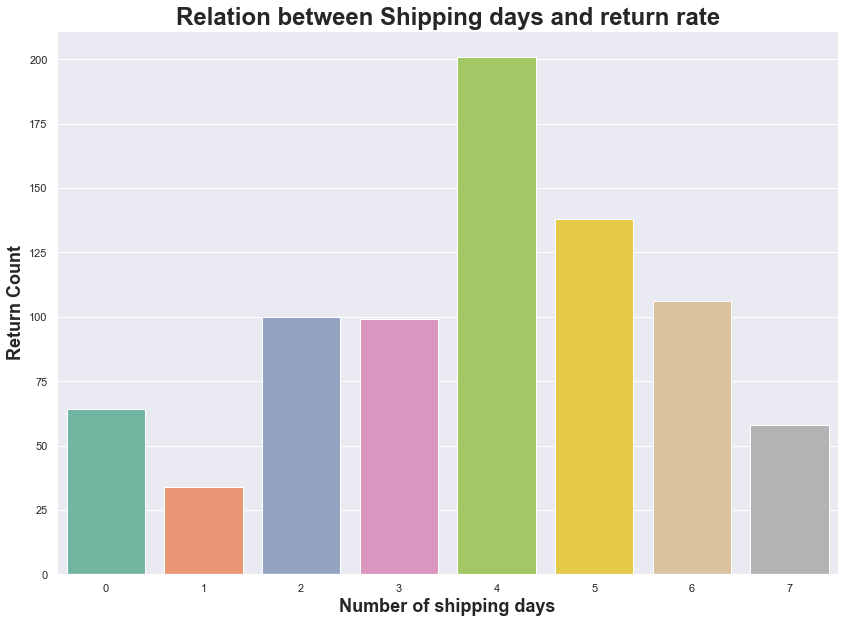

In [92]:
plt.figure(figsize=(14,10))
sns.barplot(x = days_of_shipping.index ,
            y = days_of_shipping,
            palette = 'Set2')
plt.title('Relation between Shipping days and return rate', fontsize = 24, weight = 'bold')
plt.xlabel('Number of shipping days', fontsize = 18, weight = 'bold')
plt.ylabel('Return Count', fontsize = 18, weight = 'bold')

plt.show();

>There is no correlation between the number of days between placing an order and shipping and the return rate, actually orders that took 7 days until shipped have the second lower return rate.

In [93]:
month_return = df.groupby('order_month')['returns'].sum()

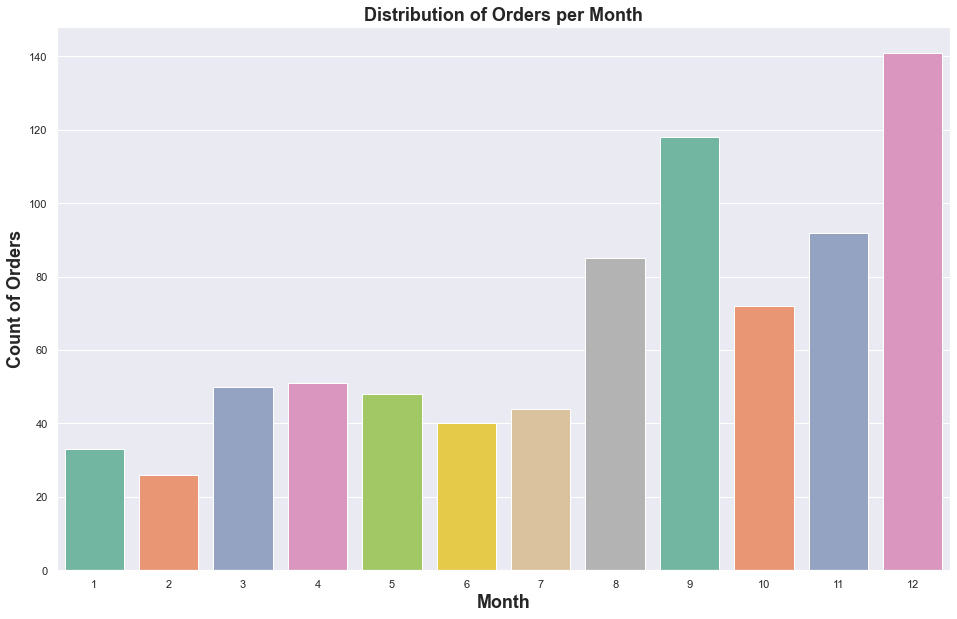

In [94]:
plt.figure(figsize=(16, 10))
sns.barplot(x= month_return.index,
            y = month_return,
            palette = 'Set2')
plt.title('Distribution of Orders per Month', fontsize = 18, weight = 'bold')
plt.xlabel('Month', fontsize = 18, weight = 'bold' )
plt.ylabel('Count of Orders', fontsize = 18, weight = 'bold')
plt.show()

>(Q4) is where most returns happens, August have high ratio of returned orders compared to total number of orders

# What is the quarter of the year where the most orders placed?

In [95]:
df.head(1)

,order_id,order_date,ship_date,days,ship_mode,customer_id,segment,city,state,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,returns,order_month
0,CA-2016-152156,2016-11-08,2016-11-11,3,Second Class,CG-12520,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,11


In [96]:
month_freq = df.groupby('order_month')['order_id'].count().sort_values(ascending = False)
month_freq

order_month
11    1471
12    1408
9     1383
10     819
5      735
6      717
7      710
8      706
3      696
4      668
1      381
2      300
Name: order_id, dtype: int64

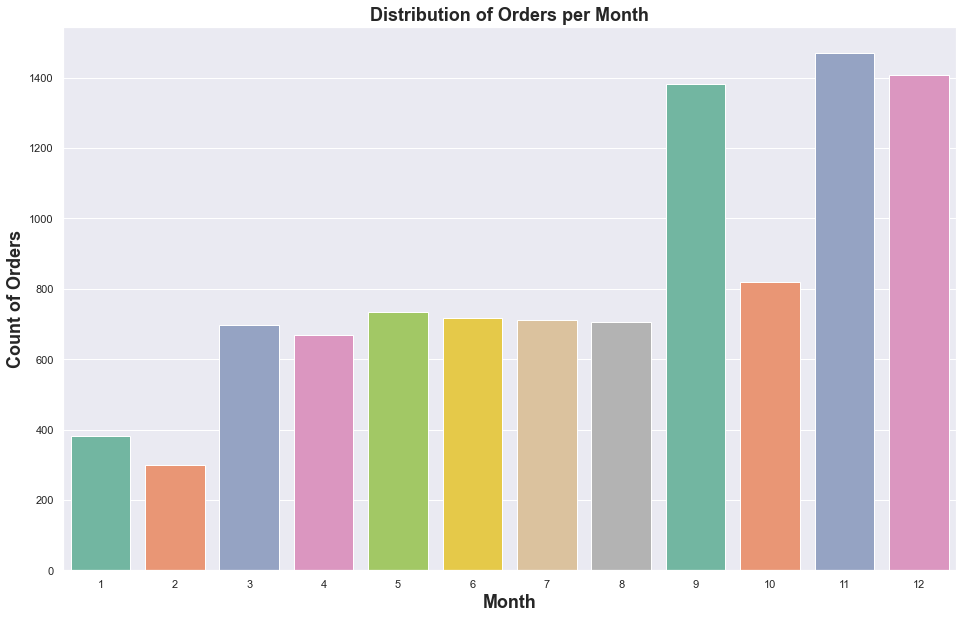

In [97]:
plt.figure(figsize=(16, 10))
sns.barplot(x= month_freq.index,
            y = month_freq,
            palette = 'Set2')
plt.title('Distribution of Orders per Month', fontsize = 18, weight = 'bold')
plt.xlabel('Month', fontsize = 18, weight = 'bold' )
plt.ylabel('Count of Orders', fontsize = 18, weight = 'bold')
plt.show()

>November is the month where most orders placed with almost 1500 order, while febreuary is the lowest with only 300.

>The Last Quarter of the year (Q4) is the period where most orders placed.

<a id='conclusions'></a>
# Conclusions:

> California, New york and Texas are the states with highest market share in terms of Sales.

> California, New york and Texas are the states with highest market share in terms of Volume.

> California and New york are by far the states with highest profits, while Texas made the highest loss.

> The West have the highest share in terms of Sales with 31.58%, while the South have the lowest share with only 17.05%.

> The West have the highest share in terms of Volume with 32.39%, while the South only shares 16.39%.

> The West have the highest share in terms of Profit with 37.86%, while the Central only shares 13.86% of profits.

> There is a weak positive correlation between sales and profit, the Central region seems to deviate from the trend of the data
 
> There is a weak negative correlation between profits and quantity of items sold.

> There is a negative correlation between profit and discounts, the Central region has the highest discounts which cost it huge losses.

> The four regions follows the same trend, Office Supplies is by far the most frequent category, then furniture and at last comes Technology.

>Copiers, Phones and Accessories are the most profitable sub-categories, while Tables sub-category is associated alone with almost 20,000 dollars loss.

> In all southern states the most frequent category is Office Supplies, Florida is the state with the highest number of orders, while Louisiana comes last.

>In Southern states, the highest profit came from Georgia with the sub-category binders, the highest loss came from North Carolina with Machines and Tables.

> In all western states the most frequent category is Office Supplies, California is by far the state with the highest share in terms of number of orders.

>In the west, almost all the profit comes from California, the highest sub-categories are Accessories, binders and paper,
while the highest loss in the west came from Colorado in the sub-category Machines.

> In the Central states the most frequent category is Office Supplies, Texas is by far the state with the highest share in terms of number of orders, followed by Illinois.

>Highest profit in the Central states came from Michigan in the sub-category Binders, while almost all the losses came from Texas and Illinois.

> In eastern states the most frequent category is Office Supplies, three states almost share the whole number of orders, New york, followed by Pennsylvania and Ohio.

>In the East, New york leads the charts and Machines is the most profitable sub-category, while Ohio made almost 12000 dollars loss in Machines only.

> The West shares 61.25% of all returned orders, while the South only shares 8.62%.

> In the West the ratio of returned orders is quite high with 15% of all orders, while the ratio hasn't exceed 5% for the three other regions.

> Almost all returned orders in the West comes from California with almost 350 returned order followed by Washington.

> In the South, Tennessee is the state with the highest number of returned orders, followed by Florida and Georgia.

> In the Central, Texas and Illinois are the states with the highest returned orderes.

> In the East, New york and Ohio are the states with the highest returned orders.

>Most returned orders are from both binders and paper.

> There is no correlation between the number of days between placing an order and shipping and the return rate, actually orders that took 7 days until shipped have the second lower return rate.

>(Q4) is where most returns happens, August have high ratio of returned orders compared to its total number of orders.

>November is the month where most orders placed with almost 1500 order, while febreuary is the lowest with only 300.

>The Last Quarter of the year (Q4) is the period where most orders placed.

<a id='recommendations'></a>
# Recommendations:

> In terms of Sales and Profits California and New york are topping the charts, Texas is the state where we should focus upon because Texas is the third state in terms of sales and volume while making the highest losses with around 25730 dollars.

>The west is the highest region in terms of Sales, Volume and Profit, We should target the Central region because it's the region with the lowest profit.

> We should reconsider the discount policies especially in the Central region as it associated with big losses for the company and may be the reason why Texas make the highest losses and the Central region has lowest share in terms of profit.

>Office Supplies is by far the most frequent category, so we should maintain its order rate and work on improving Technology category because its numbers are very low and it it holds the highest potential of improvement in the upcoming years.

>Copiers, Phones and Accessories are the most profitable sub-categories, while Tables sub-category is associated alone with almost 20,000 dollars loss, We should focus on the profitable sub-categories, and further investigate the tables sub-category to understand why that amount of losses have happened and how to avoid it in the future.

>In the South, Florida comes first in terms of order rate, while Louisiana comes last. Maybe we should implement the system we use with Florida and use it with Louisiana.

>In Southern states, the highest profit by far came from Georgia with the sub-category binders, the highest loss came from North Carolina with Machines and Tables which means that there is something should be fixed in North Carolina.

> In the West, California comes first in terms of order rate, while Idaho and Montana comes last with almost no order rate. We should focus on both states because their numbers are very low compared to California, the distribution of order rate in the west is very fluctated which means that there is both a lot of work left to do and also huge potential.

>In the west, almost all the profit comes from California, the highest sub-categories are Accessories, binders and paper,
while the highest loss in the west came from Colorado in the sub-category Machines which is a sub-category that needs a lot of focus.

>In the Central, Texas is by far the state with the highest share in terms of number of orders, followed by Illinois, Texas is by far the state which we should focus for next period, its numbers are great while making the biggest loss.

>Highest profit in the Central states came from Michigan in the sub-category Binders, while almost all the losses came from Texas and Illinois, our strategy in both texas and Illinois need a reshape and a thourough investigation.

> In the east, three states almost share the whole number of orders. New york, followed by Pennsylvania and Ohio. The rest states have a huge potential of improvement in the future.

>In the East, New york leads the charts and Machines is the most profitable sub-category, while Ohio made almost 12000 dollars loss in Machines only.

>In four regions, Binders seem the most profitable sub-category, only in the east machines were the most profitable sub-category, while it seems that there is a problem in the sub-category Machines, actually it's has the most losses across the four regions, the strategy associated with Machines needs to be investigated.

>The West shares 61.25% of all returned orders, while the South only shares 8.62%, we should change our strategies in the west and further investigate this high percentage. Almost 15% of the West Orders are returned!!. We may check with the western customers reviews and reasons of returning the orders. Was the order broken, different, used? Was it a misleading info or advertisment of orders?

>Most returned orders are from both binders and paper, this is where we should focus our analysis.

>California is the place we should focus our investigation, California has 338 from all 800 returned orders, this is almost half, we shall have more investigation and questionnaires for the customers to understand where is the root of the problem.

>We concluded that there is no correlation between the number of days between placing an order and shipping and the return rate, actually orders that took 7 days until shipped have the second lower return rate, which means that we can focus our investigation in another area.

>November is the month where most orders placed with almost 1500 order, while febreuary is the lowest with only 300.

>The Last Quarter of the year (Q4) is the period where most orders placed, which means we should prepare ourselves for high order rate and adjust our inventory management to suit the order rate depeding on the period of the year.

>August has a different trend in relation to orders return order, a quite high rate compared to the rest of months, which needs further investigation.
